# Time series motifs-discords

In [1]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
#!pip install librosa
import librosa
#!pip install awkward
from IPython.display import Audio 
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

from matrixprofile.discords import discords
from matrixprofile import *

In [2]:
# PAA version
# Each column is a record, and they're indexed by a string
df = pd.read_csv("df_PAA_TRAIN.csv", skipinitialspace=True)
df

0         1         2         3         4         5         6  \
0    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
1    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
3    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
4    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
...        ...       ...       ...       ...       ...       ...       ...   
2745 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2746 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2747 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2748 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2749 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   

             7         8         9  ...      1818      1819      1820  \
0    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
1    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
3    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
4    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
...        ...       ...       ...  ...       ...       ...       ...   
2745 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2746 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2747 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2748 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2749 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   

          1821      1822      1823      1824      1825      1826      1827  
0     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
1     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
3     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
4     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
...        ...       ...       ...       ...       ...       ...       ...  
2745  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2746  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2747  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2748  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2749  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  

[2750 rows x 1828 columns]

In [3]:
# after 2500 basically there is no more information
# we need an iterator for the drop method
def iterator(low, high):
    for i in range(low, high):
        yield i

df.drop(list(iterator(2500, 2750)), axis=0, inplace=True)

In [4]:
df

0         1         2         3         4         5         6  \
0    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
1    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
3    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
4    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
...        ...       ...       ...       ...       ...       ...       ...   
2495 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2496 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2497 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2498 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2499 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   

             7         8         9  ...      1818      1819      1820  \
0    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
1    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
3    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
4    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
...        ...       ...       ...  ...       ...       ...       ...   
2495 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2496 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2497 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2498 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2499 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   

          1821      1822      1823      1824      1825      1826      1827  
0     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
1     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
3     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
4     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
...        ...       ...       ...       ...       ...       ...       ...  
2495  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2496  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2497  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2498  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2499  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  

[2500 rows x 1828 columns]

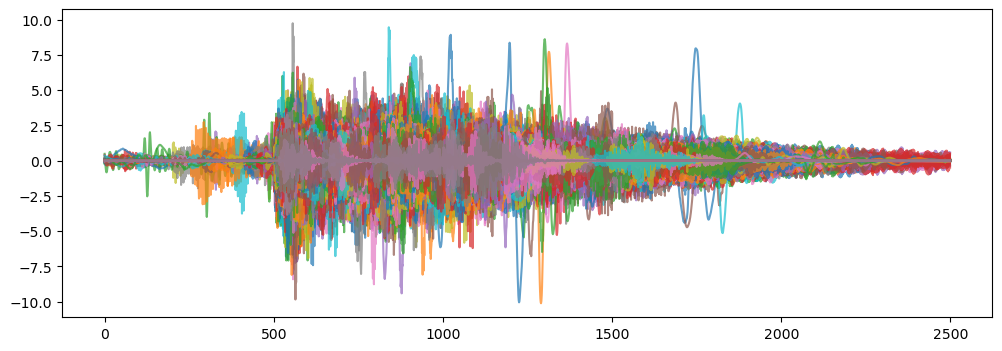

In [5]:
plt.figure(figsize=(12,4))
for i in range(1828):
    plt.plot(df[str(i)], alpha=0.7)
plt.show()

### Import kmeans clusters centroids

In [5]:
# Fra's kmeans
with open("km_dtw.pkl", "rb") as file:
    km_dtw = pickle.load(file)

In [6]:
np.squeeze(km_dtw.cluster_centers_)[4][0:].T

array([-0.04531489,  0.01799818, -0.00557121, ...,  0.00087132,
        0.00087132,  0.00087132])

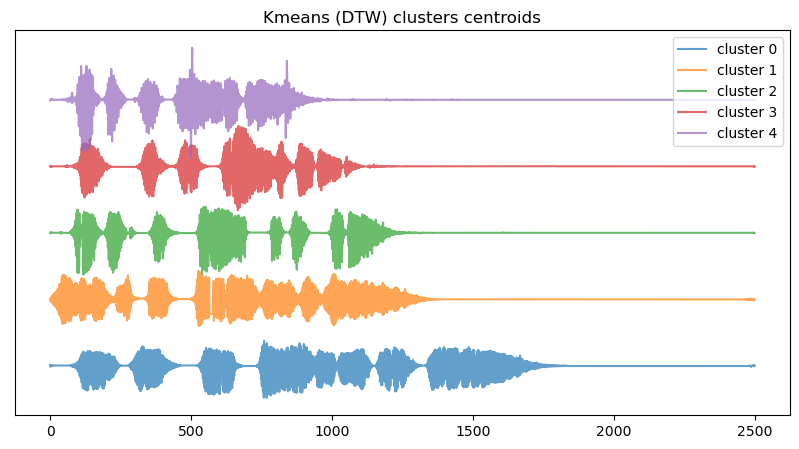

In [7]:
# visualize centroids
n_clusters = 5

plt.figure(figsize=(10,5))
plt.title('Kmeans (DTW) clusters centroids')
offset = 0   # for a better visualization
for i in range(km_dtw.cluster_centers_.shape[0]):
    plt.plot(np.squeeze(km_dtw.cluster_centers_)[i][0:].T+offset, alpha=0.7, label=('cluster ' + str(i)))
    offset += 6
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.legend(loc='upper right')
plt.show()

In [8]:
# compraison between all the centroids

print('Motifs positions:')
for i in range(5):
    ith_centroid = i
    
    ts = np.squeeze(km_dtw.cluster_centers_)[ith_centroid][0:].T
    threshold = 0.3   # to avoid mathematical errors
    
    start = np.min(np.where(abs(ts)>=threshold))
    finish = np.max(np.where(abs(ts)>=threshold))
    ts = ts[start:finish]
    
    w = 15
    mp, mpi = matrixProfile.stomp(ts, w)   
    # efficient algorithm
    
    mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)

    print(ith_centroid, ':', mo, '\twith len:', start, ':', finish)

Motifs positions:


C:\Users\gabri\anaconda3\lib\site-packages\matrixprofile\utils.py:68: RuntimeWarning: invalid value encountered in sqrt
  movstd = np.sqrt(segSumSq / m - (segSum/m) ** 2)
C:\Users\gabri\anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:118: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))
C:\Users\gabri\anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:126: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(res.astype(complex)))
C:\Users\gabri\anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:66: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))


0 : [[0, 26], [8, 209], [16, 229], [42, 291]] 	with len: 97 : 1727
1 : [[0, 94], [8, 104], [16, 159], [24, 132], [32, 140]] 	with len: 7 : 1301
2 : [[0, 116], [8, 124], [16, 181], [24, 101], [32, 133]] 	with len: 81 : 1205
3 : [[0, 9], [17, 26], [42, 76]] 	with len: 101 : 1070
4 : [[10, 212, 350], [107, 118], [762, 770], [196, 328], [132, 262, 389]] 	with len: 74 : 912


In [9]:
# second cluster
type(np.squeeze(km_dtw.cluster_centers_)[4][0:].T)

numpy.ndarray

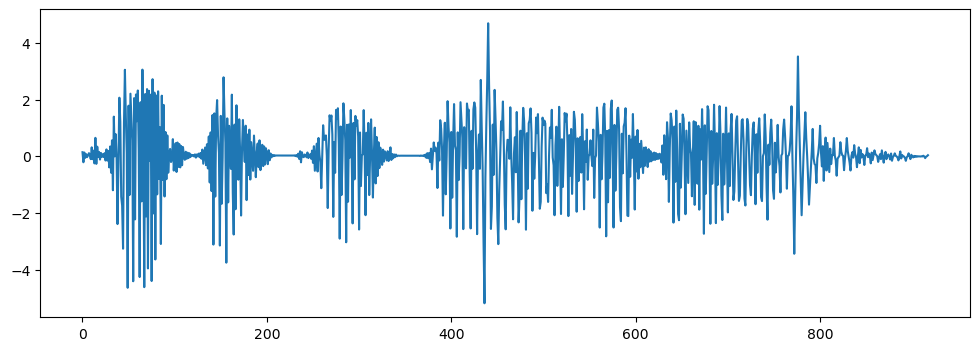

In [10]:
# using clusters centroids
ith_centroid = 4

ts = np.squeeze(km_dtw.cluster_centers_)[ith_centroid][0:].T
threshold = 0.1   # to avoid mathematical errors

start = np.min(np.where(abs(ts)>=threshold))
finish = np.max(np.where(abs(ts)>=threshold))
ts = ts[start:finish]

plt.figure(figsize=(12,4))
plt.plot(ts)
plt.show()

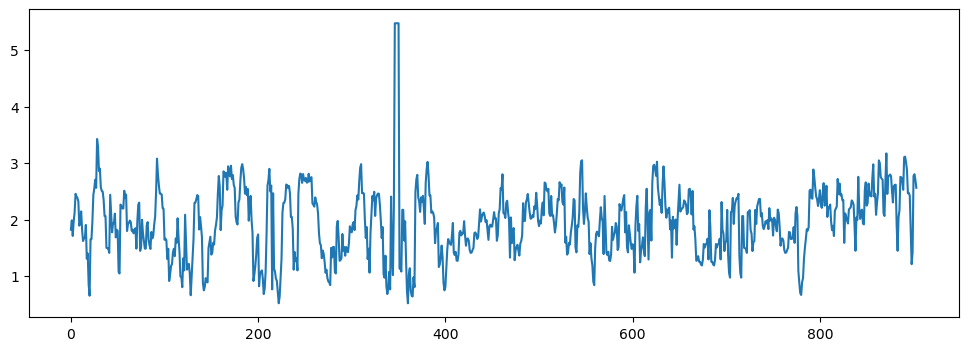

In [11]:
w = 15
mp, mpi = matrixProfile.stomp(ts, w)   
# efficient algorithm

plt.figure(figsize=(12,4))
plt.plot(mp)
plt.show()

In [12]:
#mp

In [13]:
mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)

In [14]:
mo

[[222, 360], [20, 127], [772, 780], [206, 338], [142, 272, 399]]

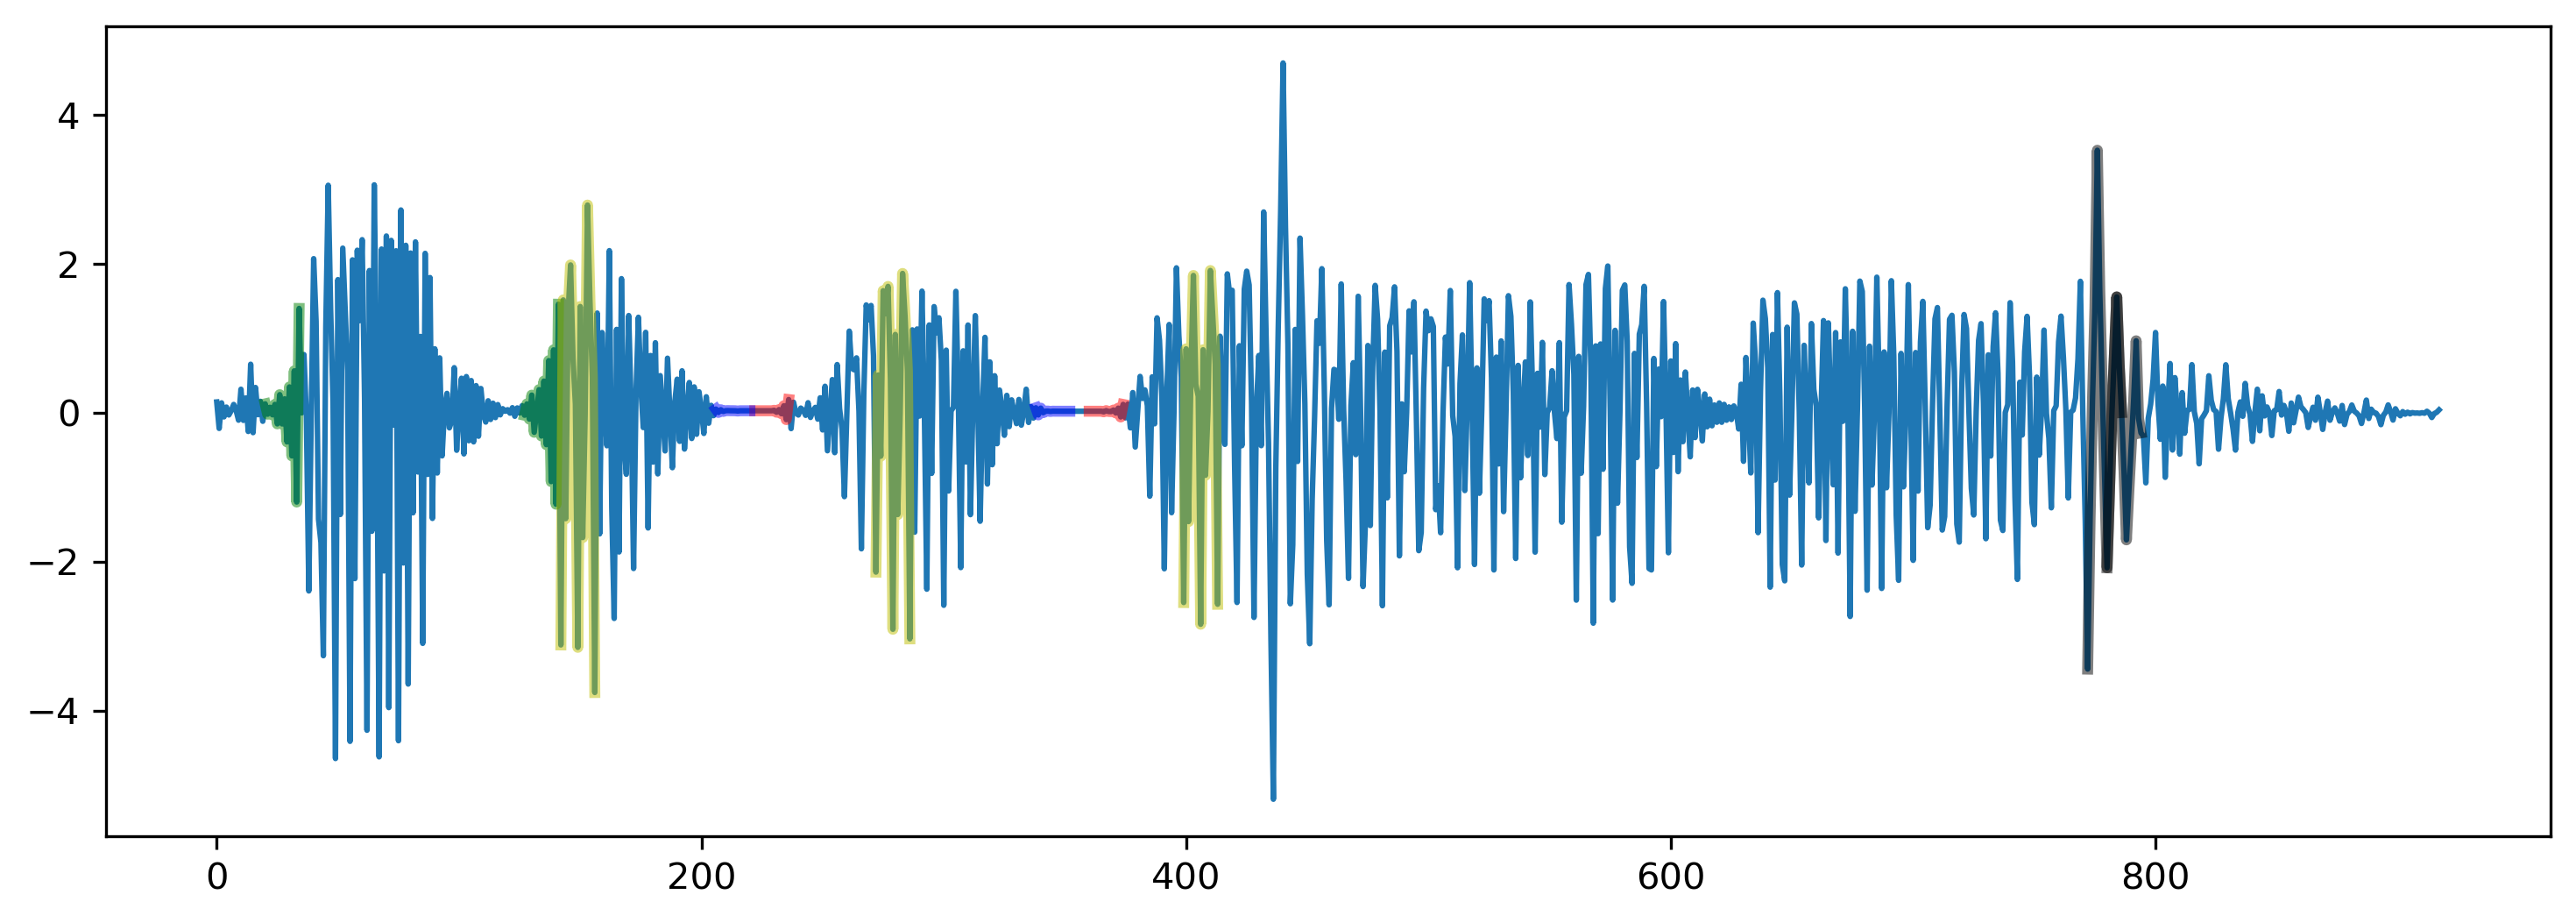

In [15]:
plt.figure(figsize=(12,4), dpi=300)
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3, alpha=0.5)

plt.show()

In [16]:
max(ts)

4.695340367534479

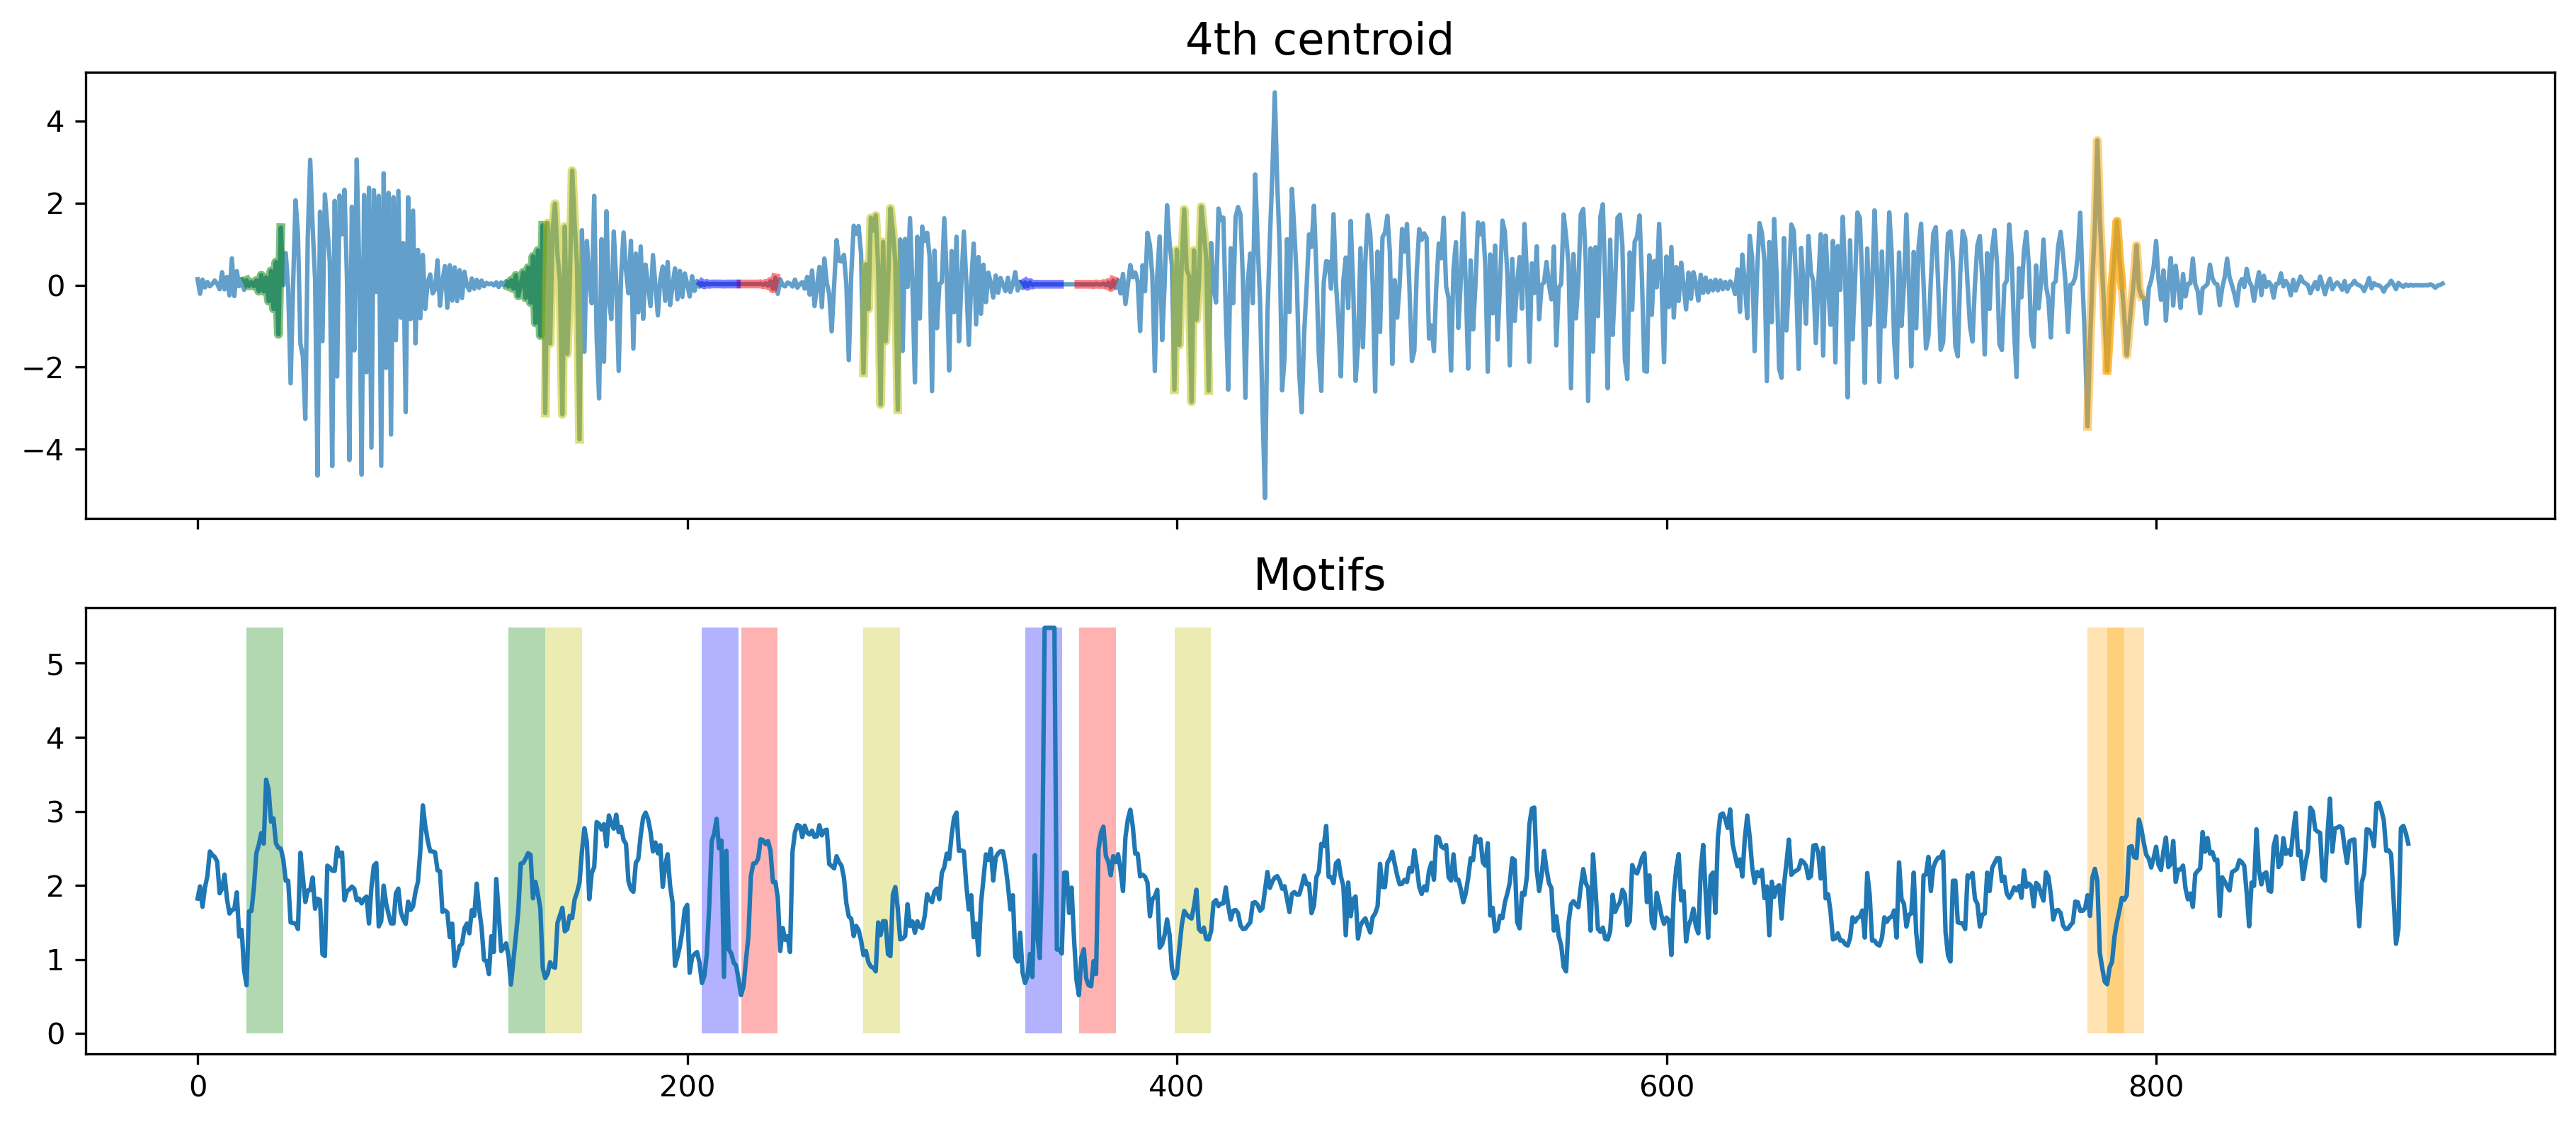

In [17]:
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,6), dpi=300)
axes[0].plot(ts, alpha=0.7)
axes[0].set_title('{}th centroid'.format(ith_centroid), size=15)
colors = ['r', 'g', 'orange', 'b', 'y'][:len(mo)]

# plot the coloured motifs
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        axes[0].plot(range(i,i+w), m_shape, color=c, lw=3, alpha=0.5)


#Plot the Matrix Profile
axes[1].plot(mp)
axes[1].set_title('Motifs', size=15)

# plot motifs
for motif, color in zip(mo, colors):
    for e in motif:
        x = e
        y = mp[e]
        rect = Rectangle((e, min(ts)), w, 2*max(abs(ts)), facecolor=color, alpha=0.3)   # for the centroid plot
        #axes[0].add_patch(rect)
        rect = Rectangle((e, 0), w, max(mp), facecolor=color, alpha=0.3)   # for the matrixprofile plot
        axes[1].add_patch(rect)
        #axes[1].plot(x, y, marker='*', markersize=10, c='r')

plt.show()

In [18]:
mo

[[222, 360], [20, 127], [772, 780], [206, 338], [142, 272, 399]]

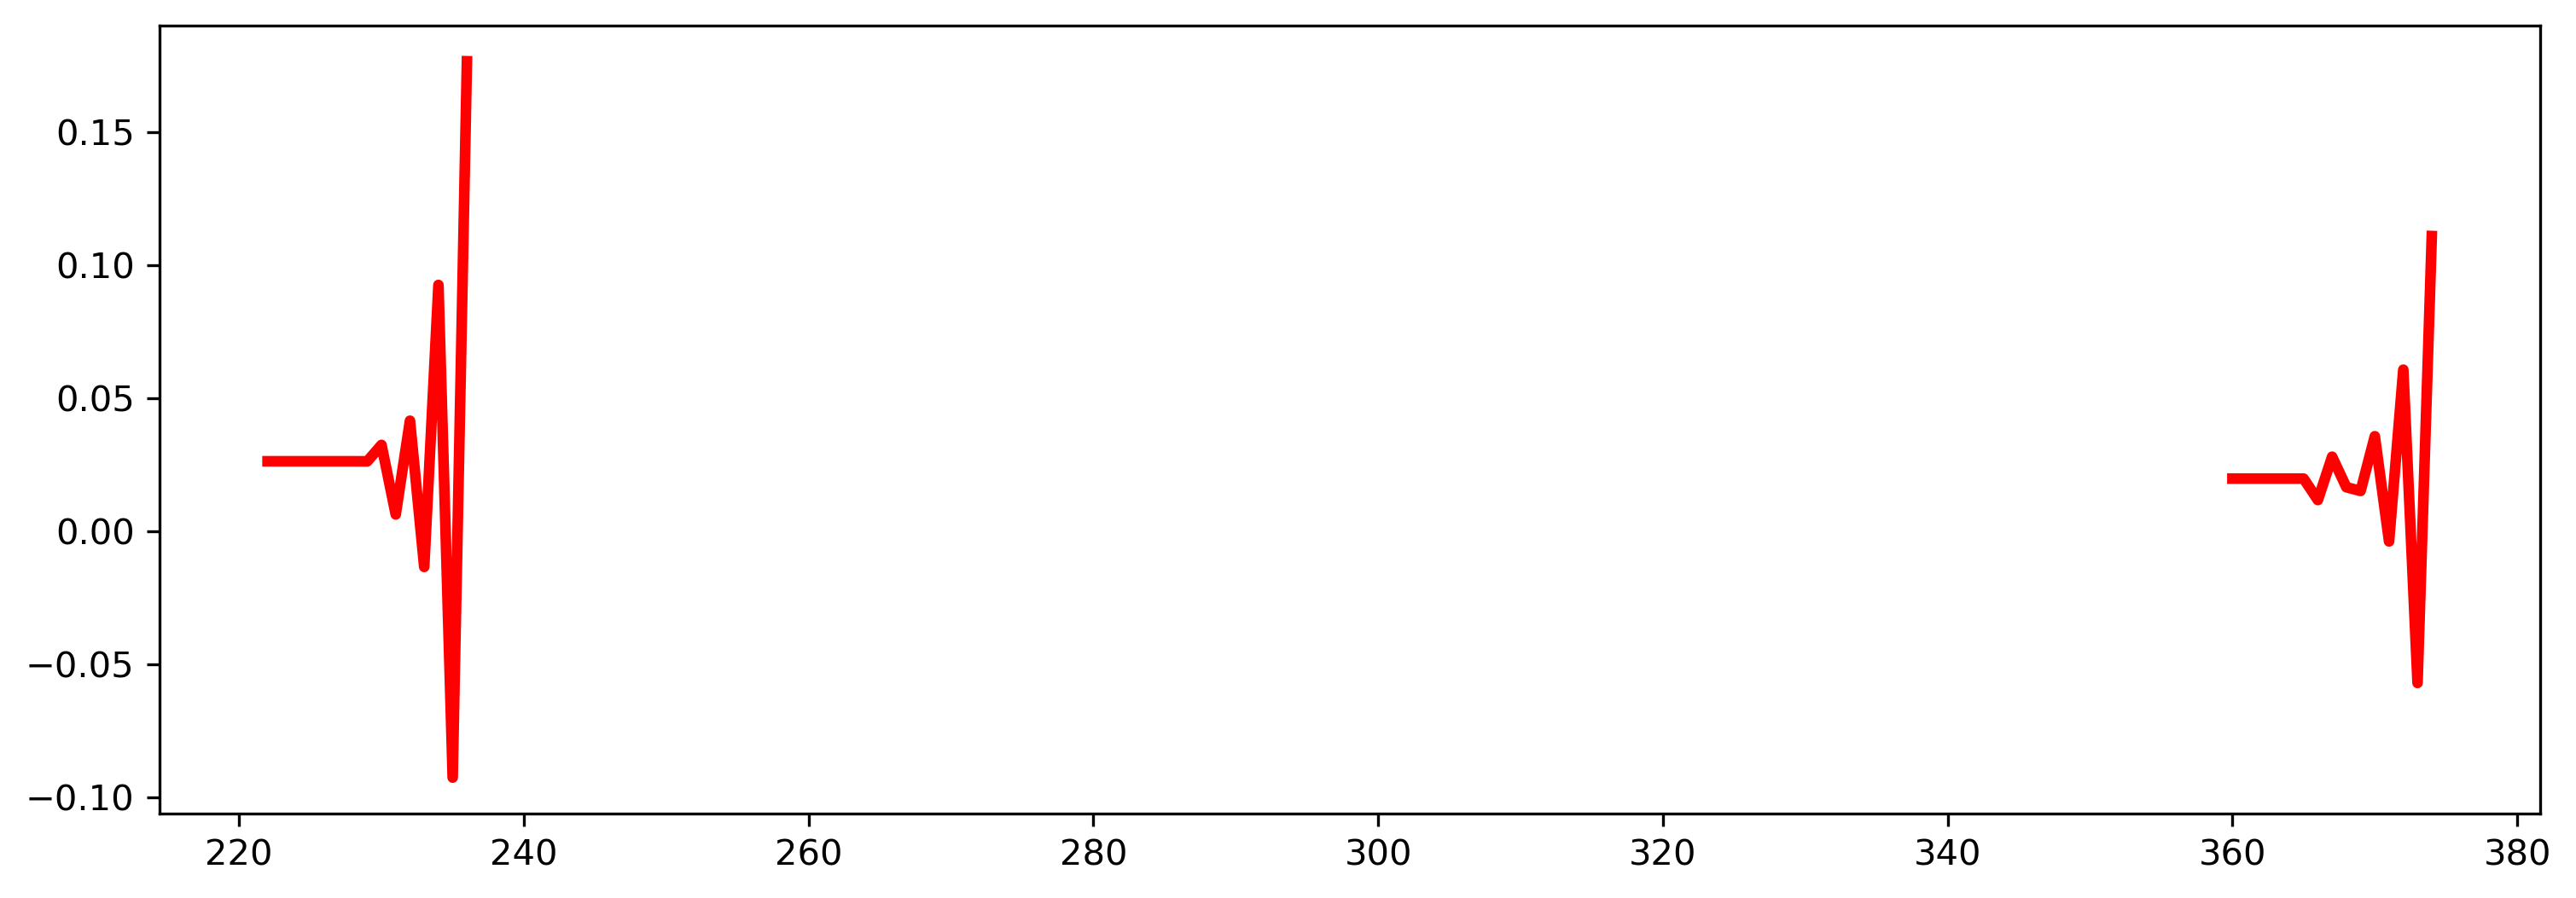

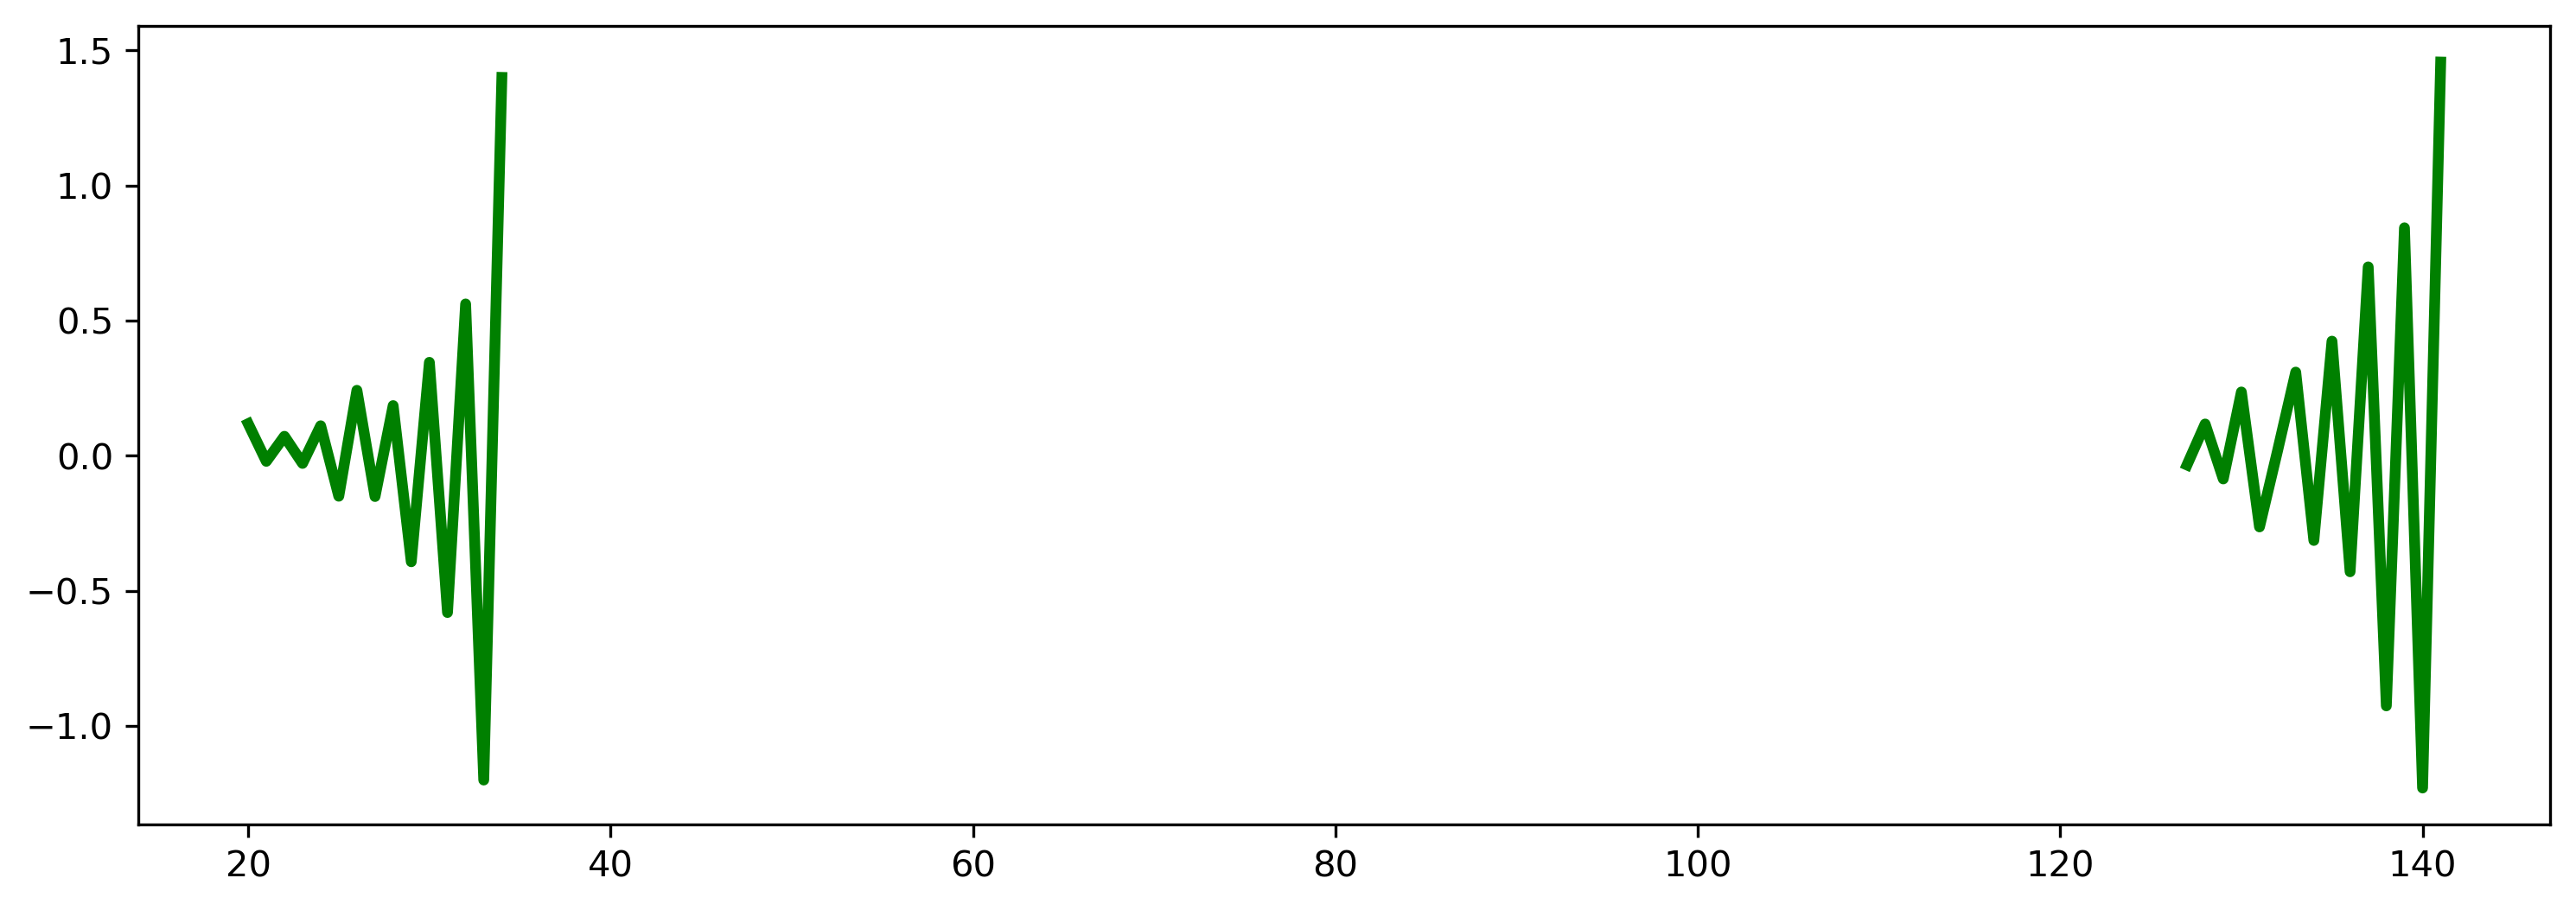

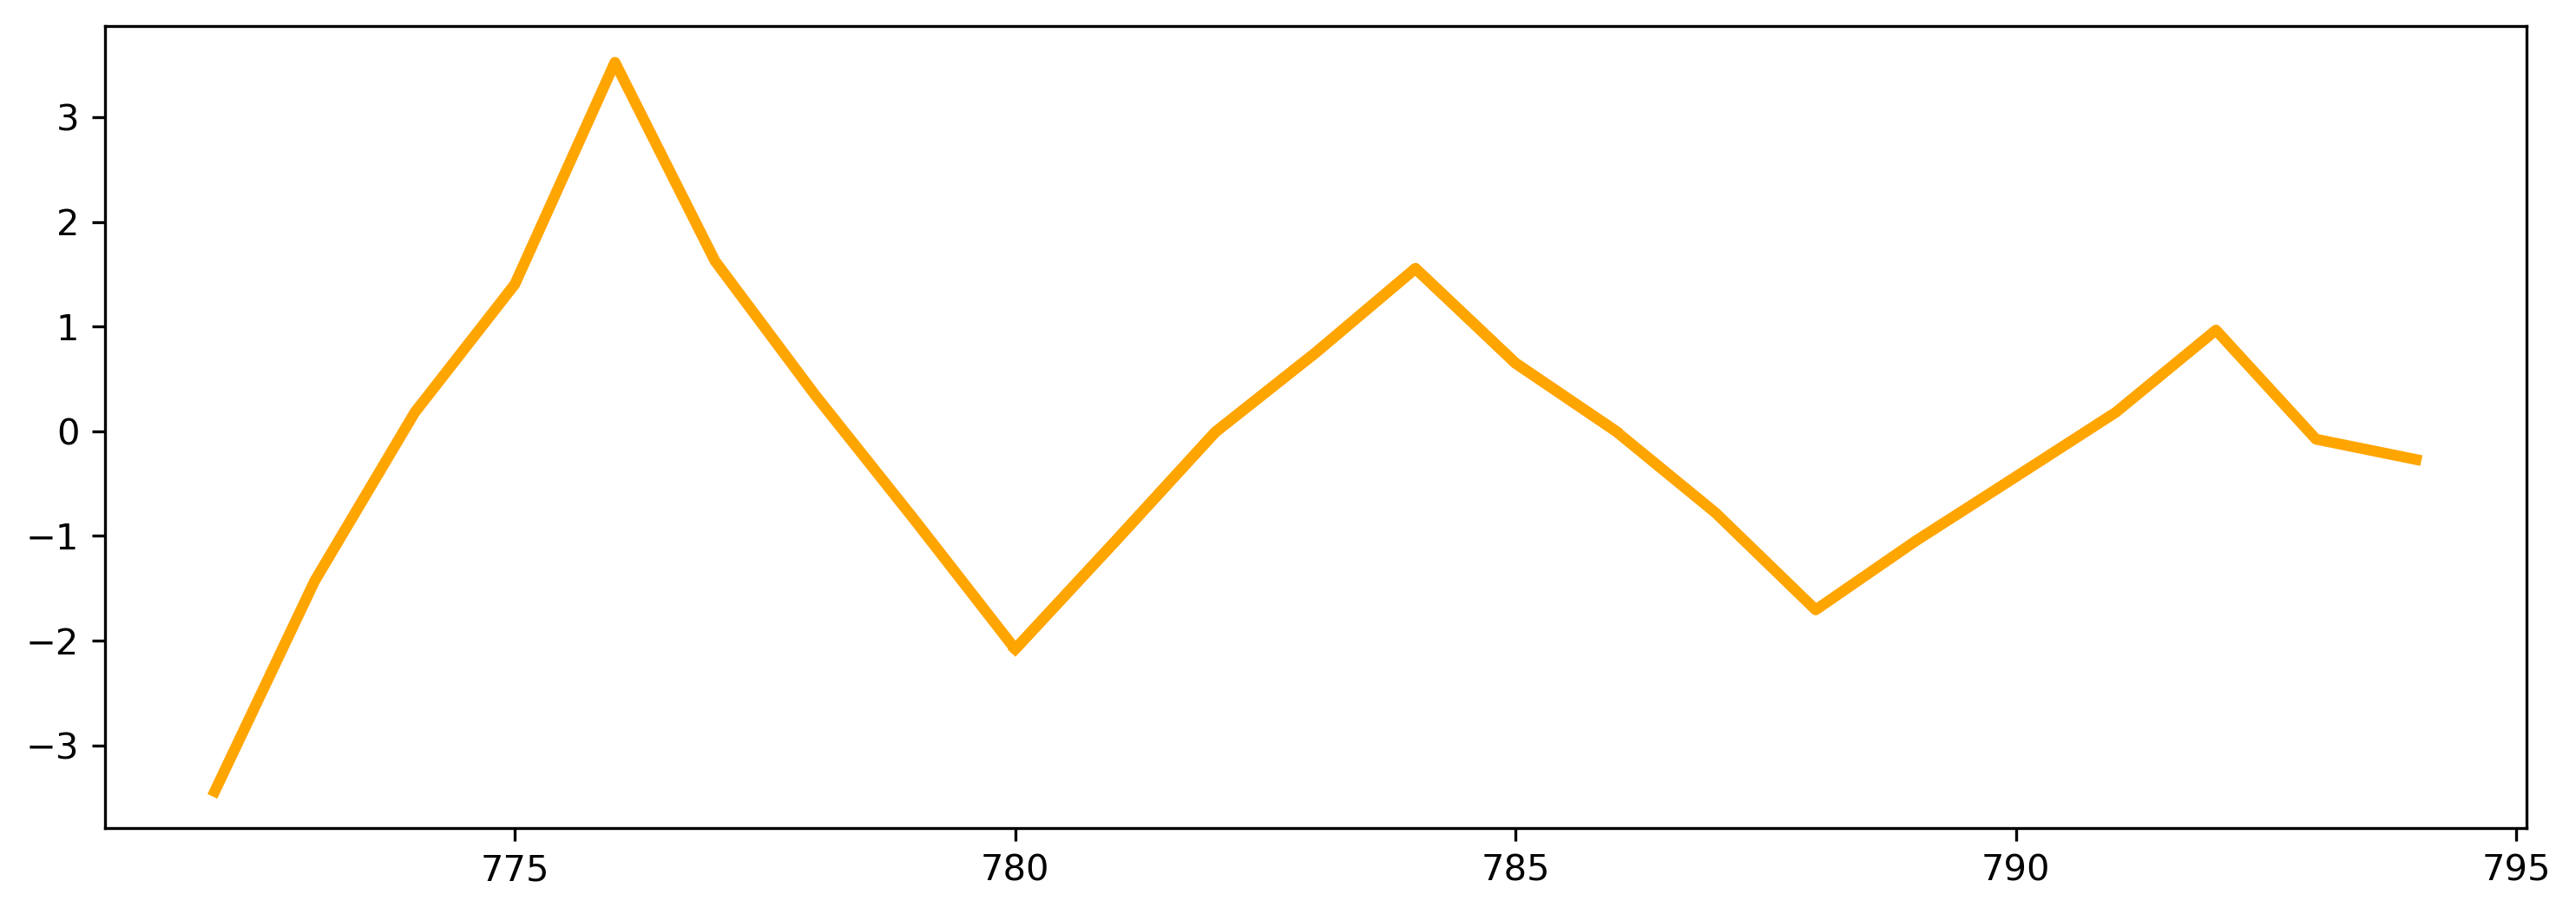

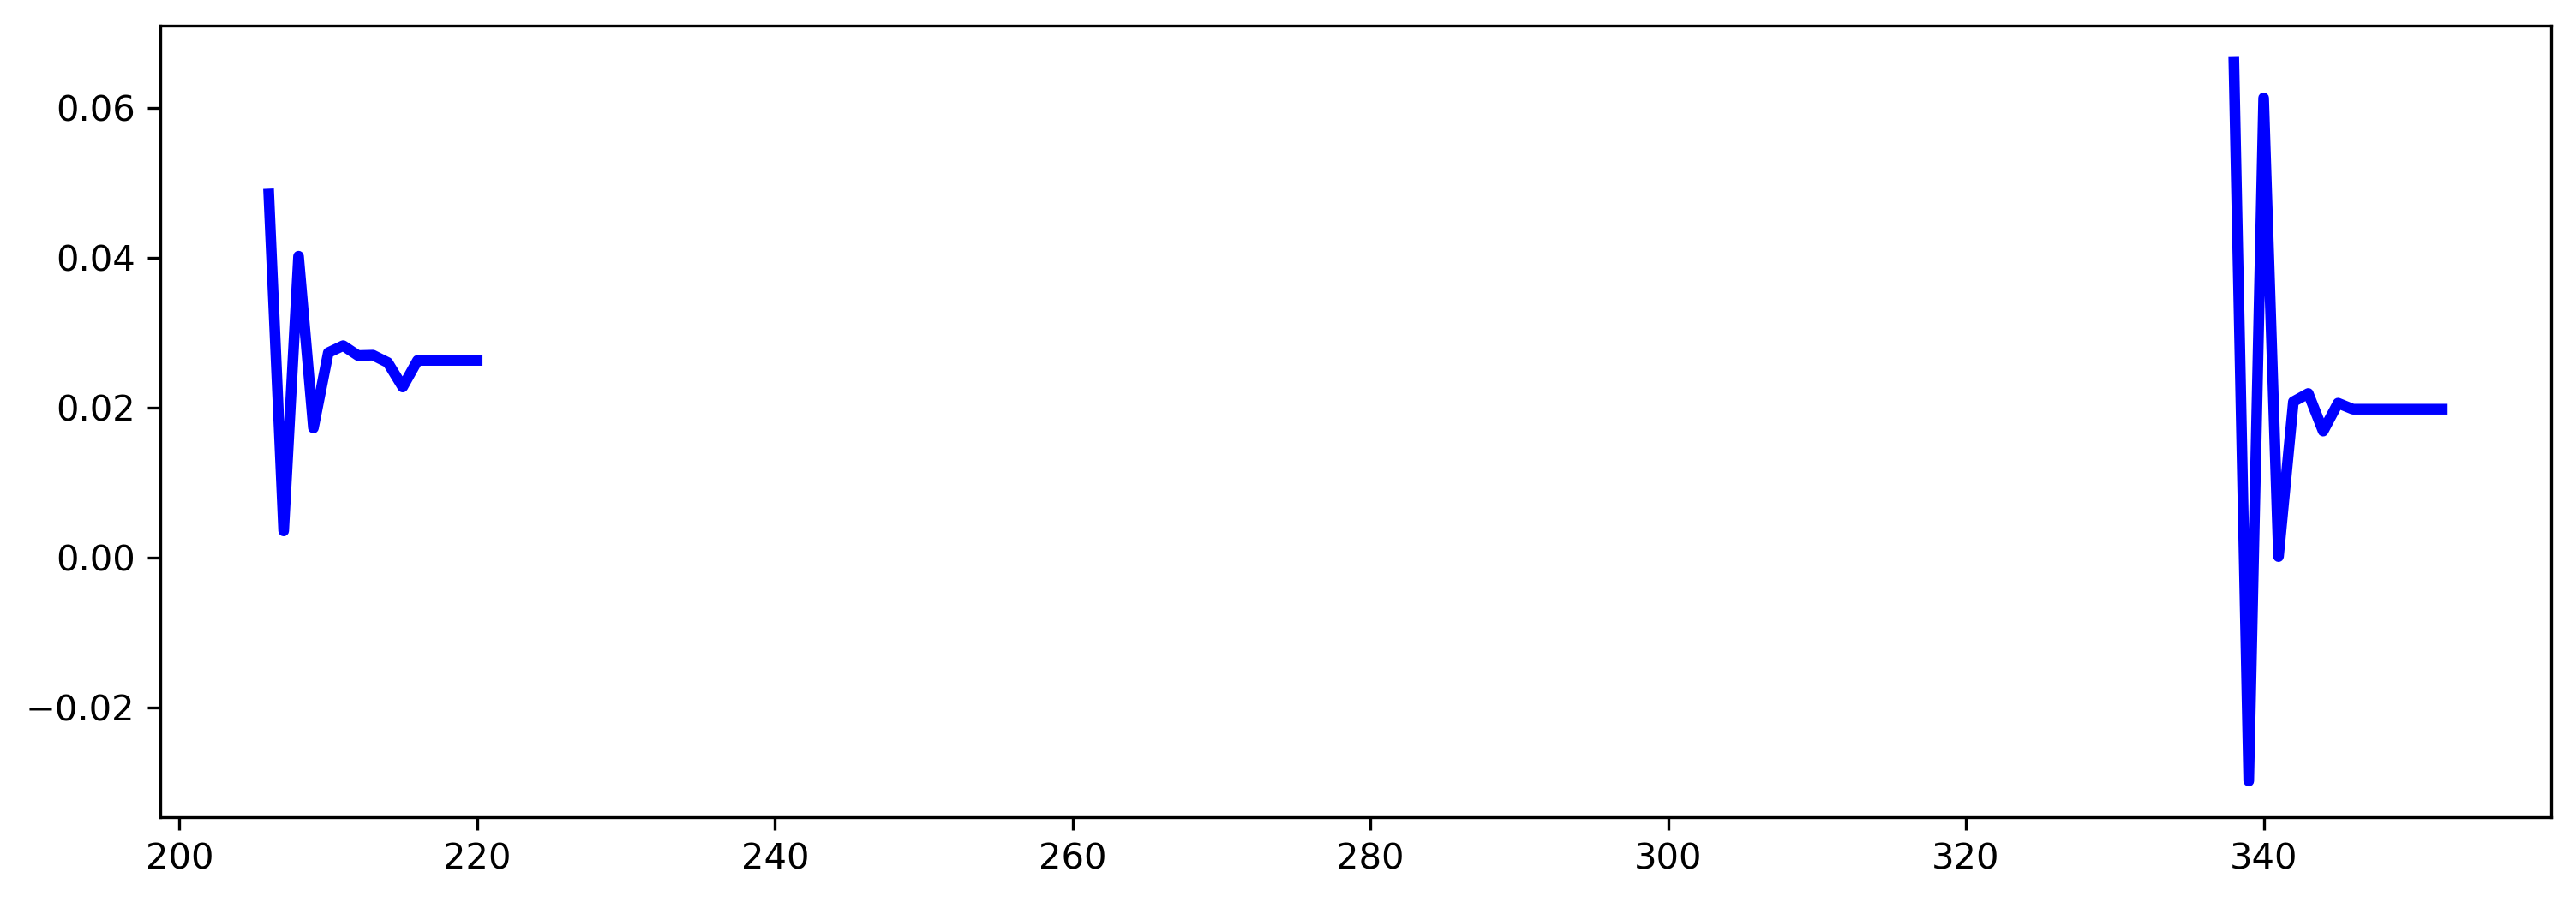

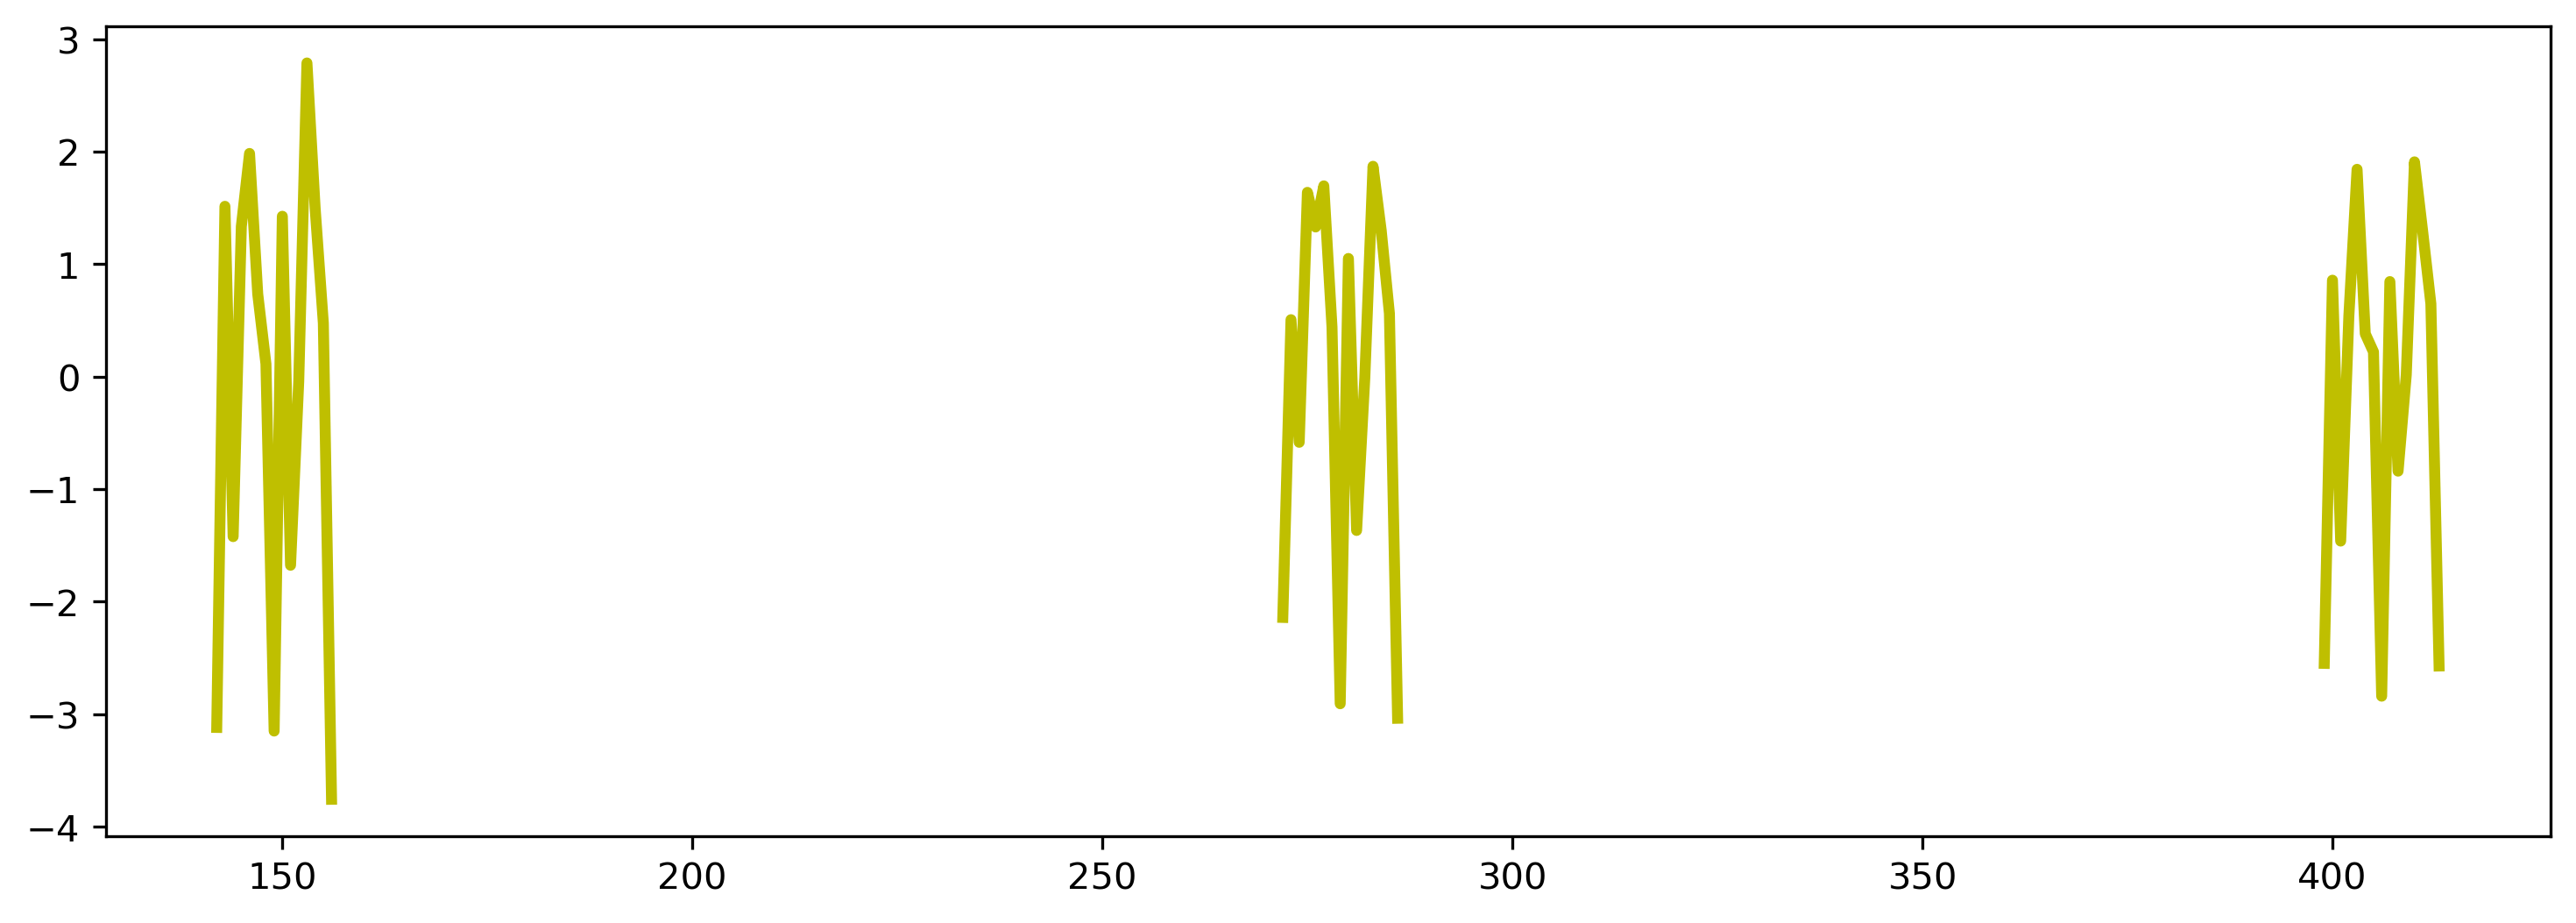

In [19]:
for m, d, c in zip(mo, mod, colors):
    plt.figure(figsize=(12,4), dpi=300)
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

### Discords

In [20]:
anoms = discords(mp, ex_zone=3, k=5)
anoms

array([349,  28, 871, 891,  92])

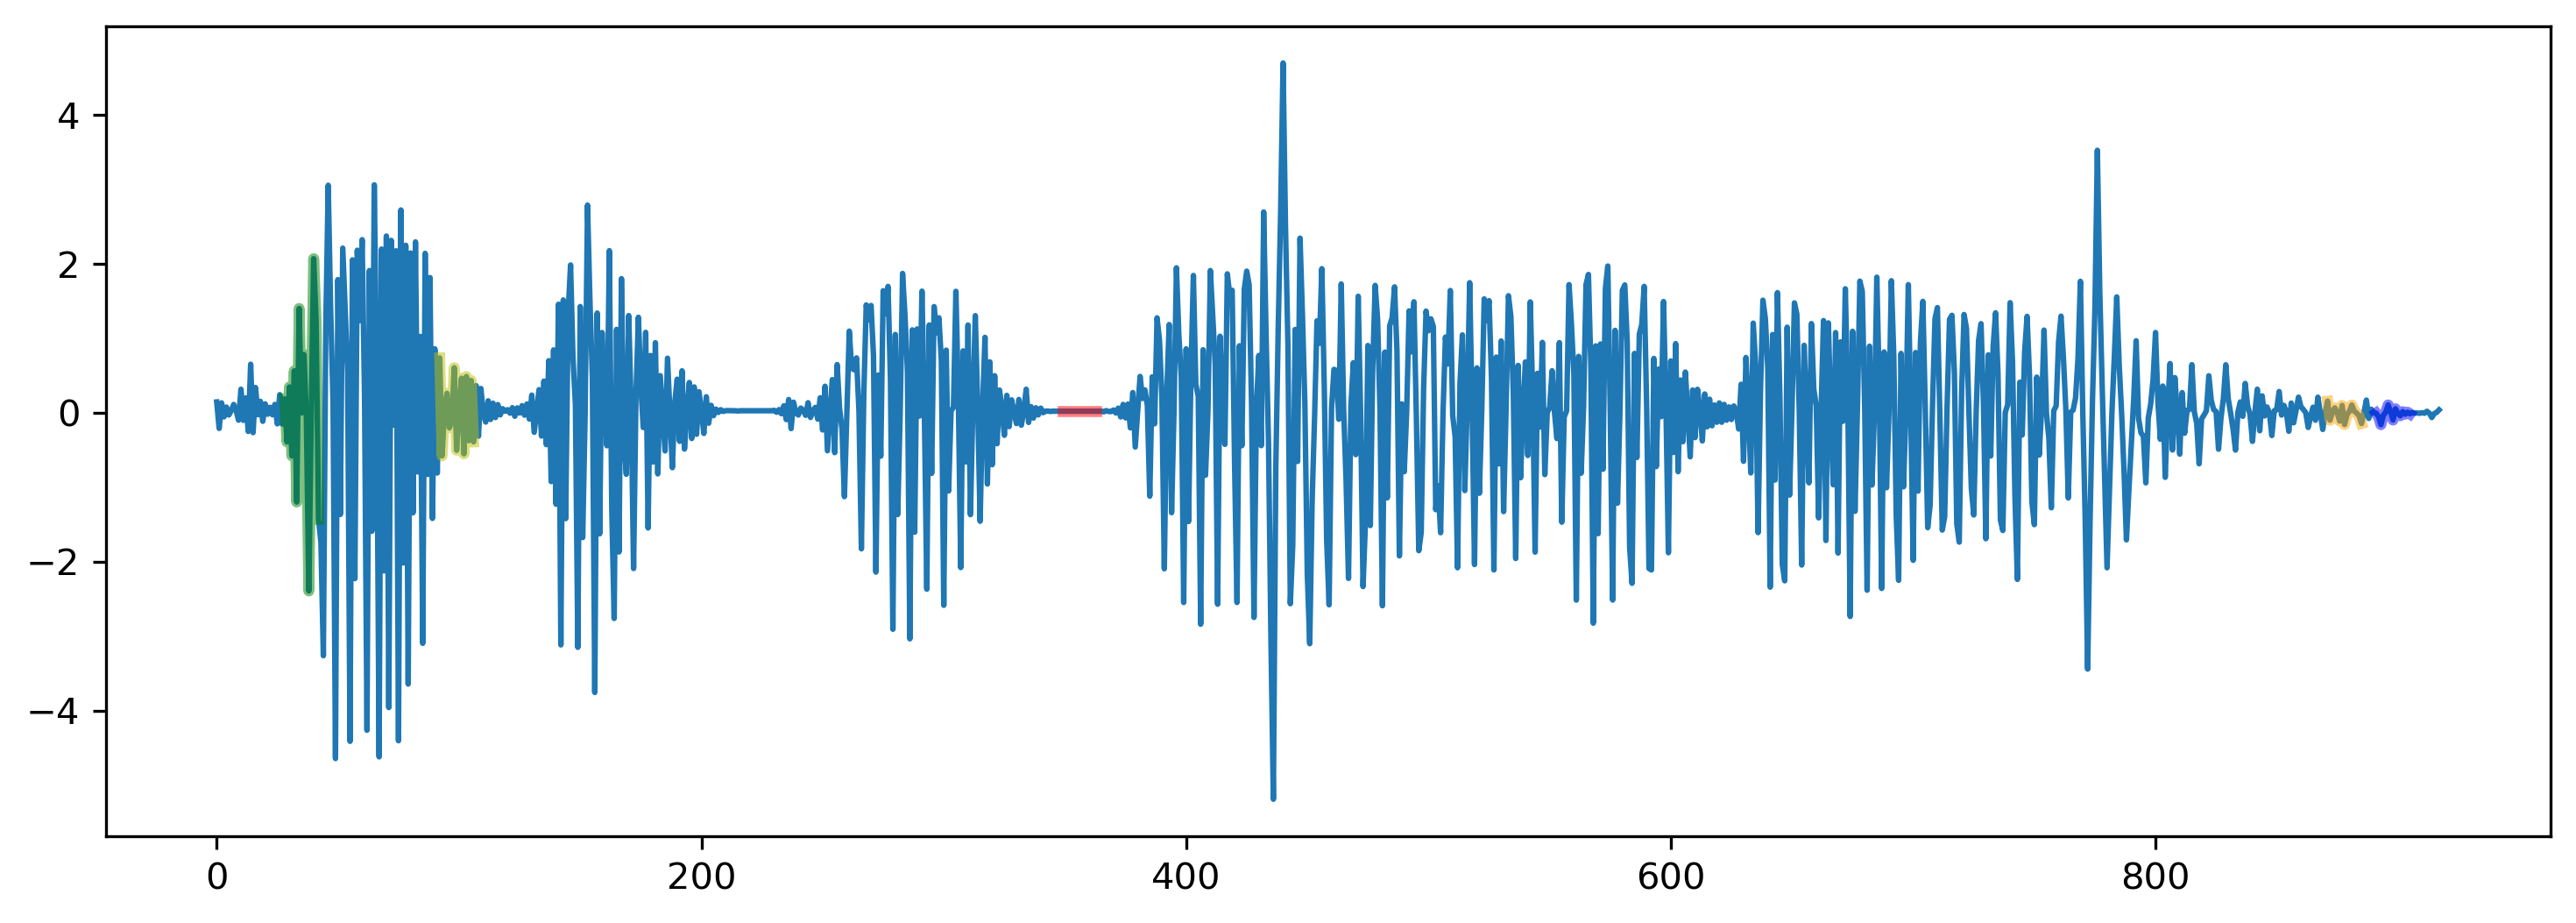

In [21]:
plt.figure(figsize=(12,4), dpi=300)
plt.plot(ts)
colors = ['r', 'g', 'orange', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3, alpha=0.5)

plt.show()

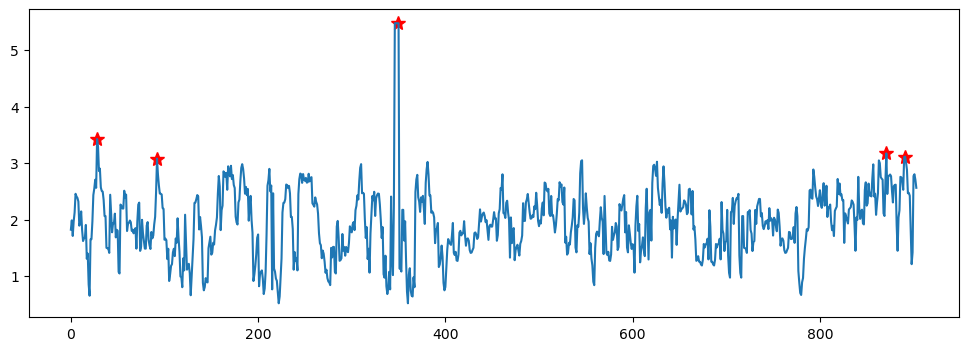

In [22]:
plt.figure(figsize=(12,4))

# plot discords with stars
for discord in anoms:
    x = discord
    y = mp[discord]
    plt.plot(x, y, marker='*', markersize=10, c='r')

plt.plot(mp)
plt.show()

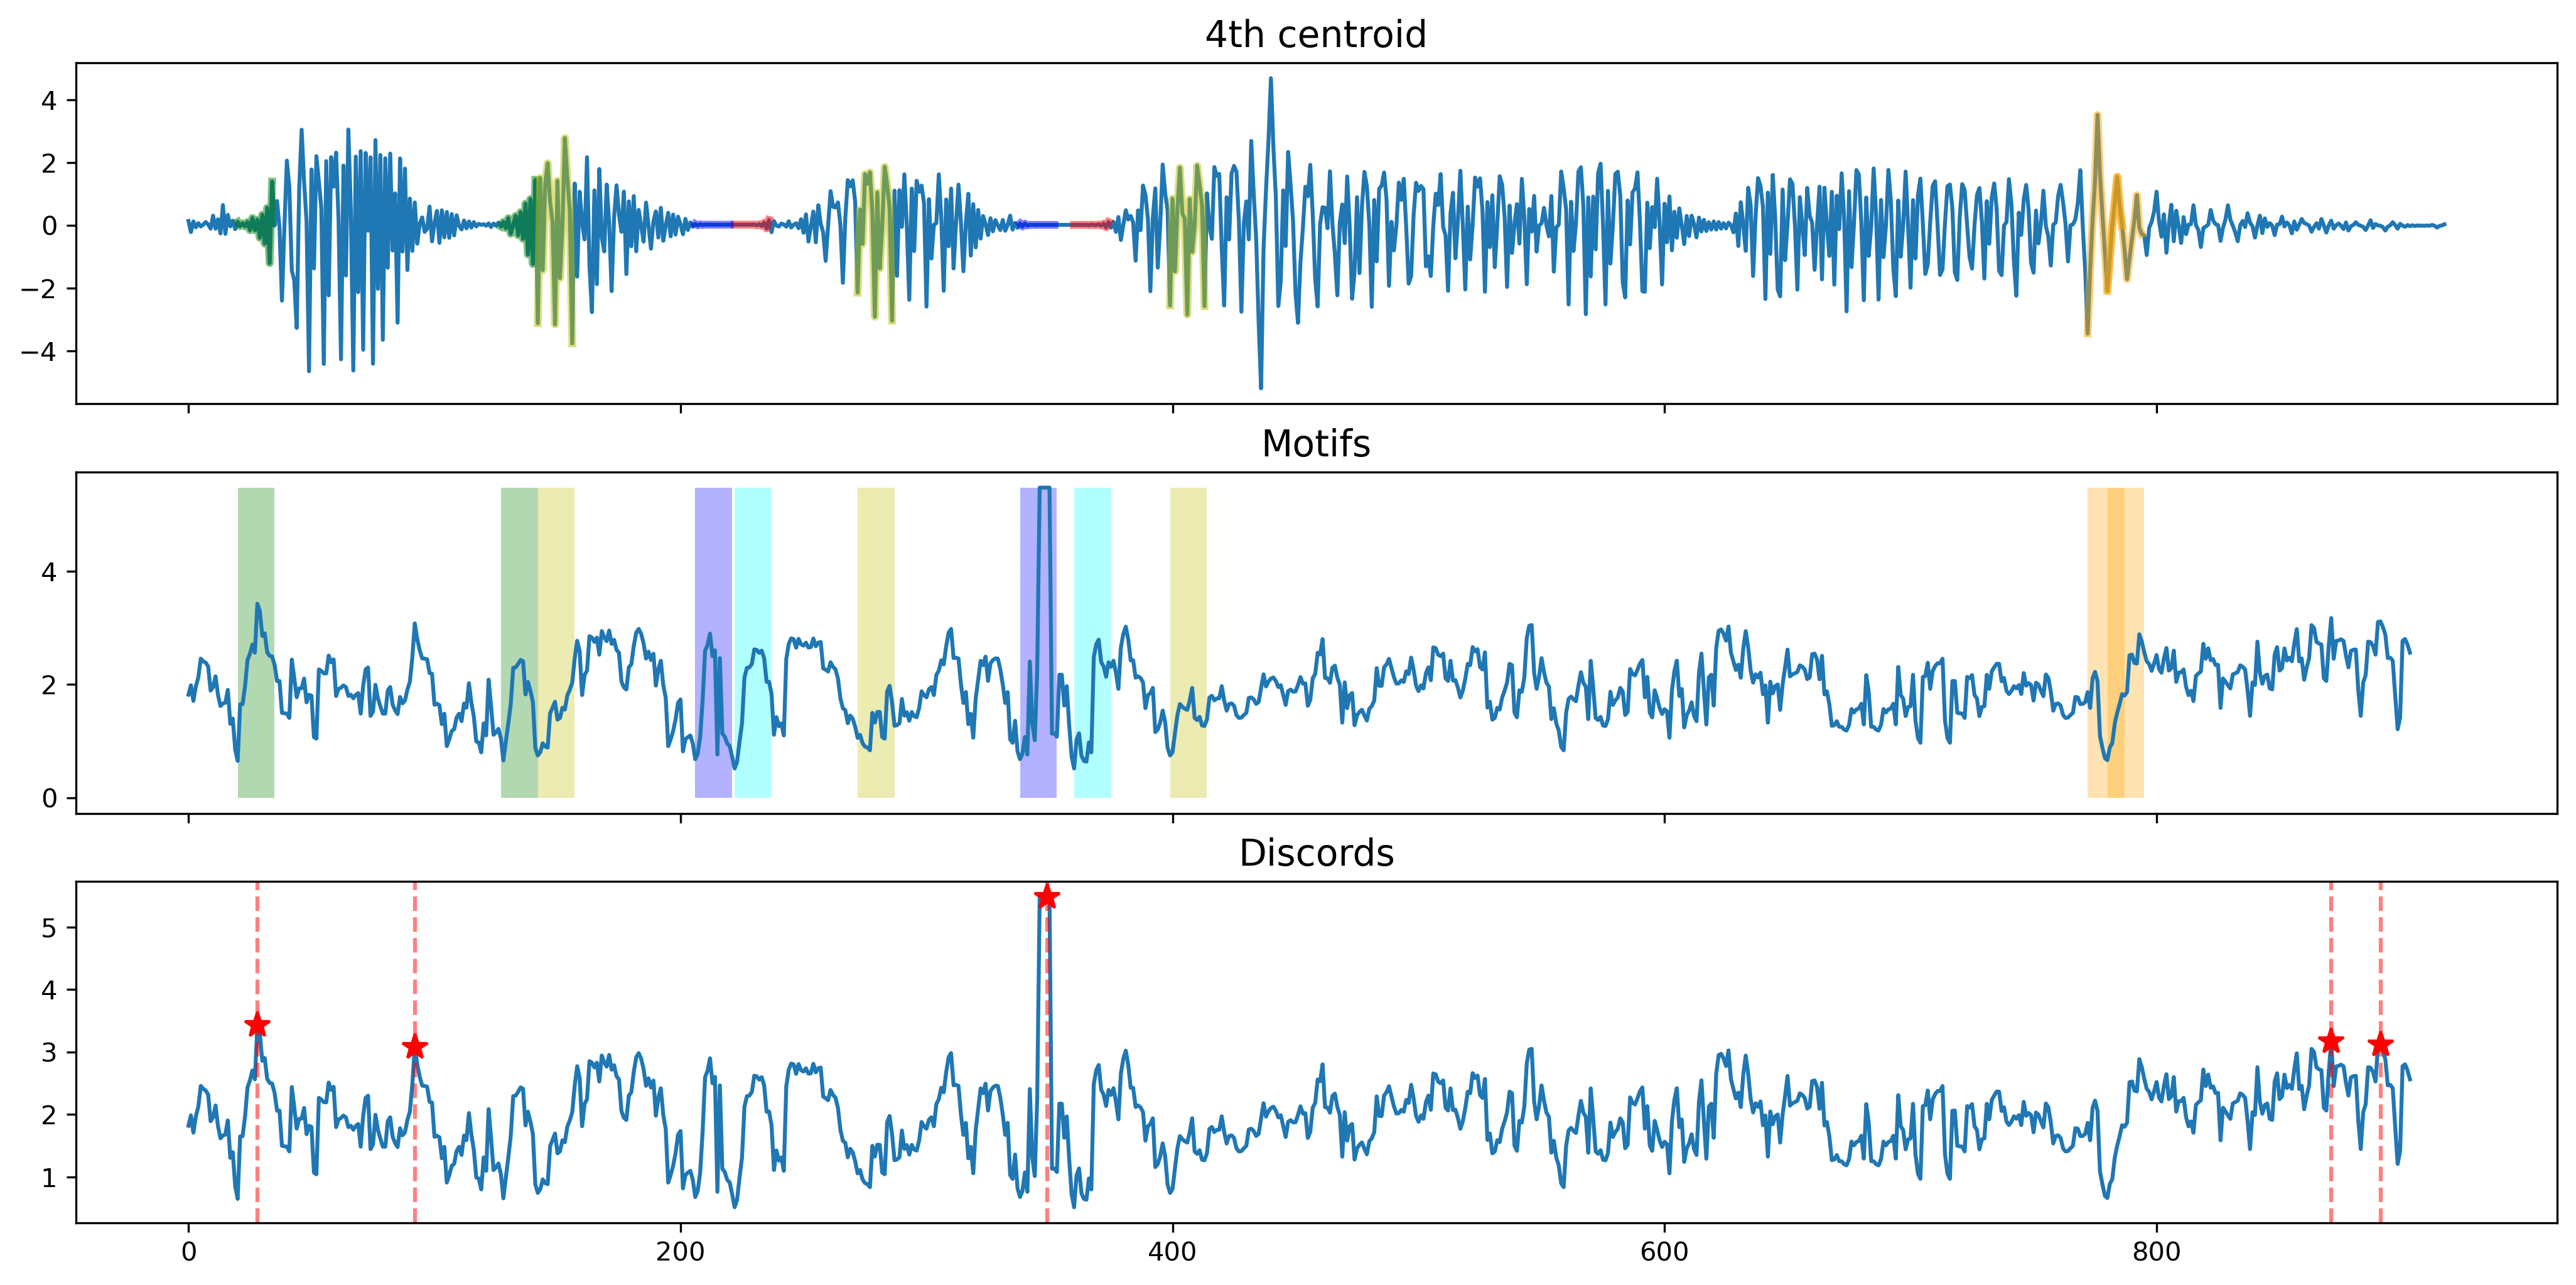

In [23]:
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(17,8), dpi=300)
axes[0].plot(ts)
axes[0].set_title('{}th centroid'.format(ith_centroid), size=14)

# plot the coloured motifs
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        axes[0].plot(range(i,i+w), m_shape, color=c, lw=3, alpha=0.5)

#Plot the Matrix Profile
axes[1].plot(mp)
axes[1].set_title('Motifs', size=14)

colors = ['cyan', 'g', 'orange', 'b', 'y'][:len(mo)]
# plot motifs
for motif, color in zip(mo, colors):
    for e in motif:
        x = e
        y = mp[e]
        rect = Rectangle((e, min(ts)), w, 2*max(abs(ts)), facecolor=color, alpha=0.3)   # for the centroid plot
        #axes[0].add_patch(rect)
        rect = Rectangle((e, 0), w, max(mp), facecolor=color, alpha=0.3)   # for the matrixprofile plot
        axes[1].add_patch(rect)
        #axes[1].plot(x, y, marker='*', markersize=10, c='r')

axes[2].plot(mp)
axes[2].set_title('Discords', size=14)
# plot discords with stars
for discord in anoms:
    x = discord
    y = mp[discord]
    plt.plot(x, y, marker='*', markersize=10, c='r')
    axes[2].axvline(x, linestyle="dashed", c='r', alpha=0.5)
    #rect = Rectangle((x, 0), w, max(mp), facecolor='r', alpha=0.4)   # for the centroid plot
    #axes[2].add_patch(rect)


plt.show()

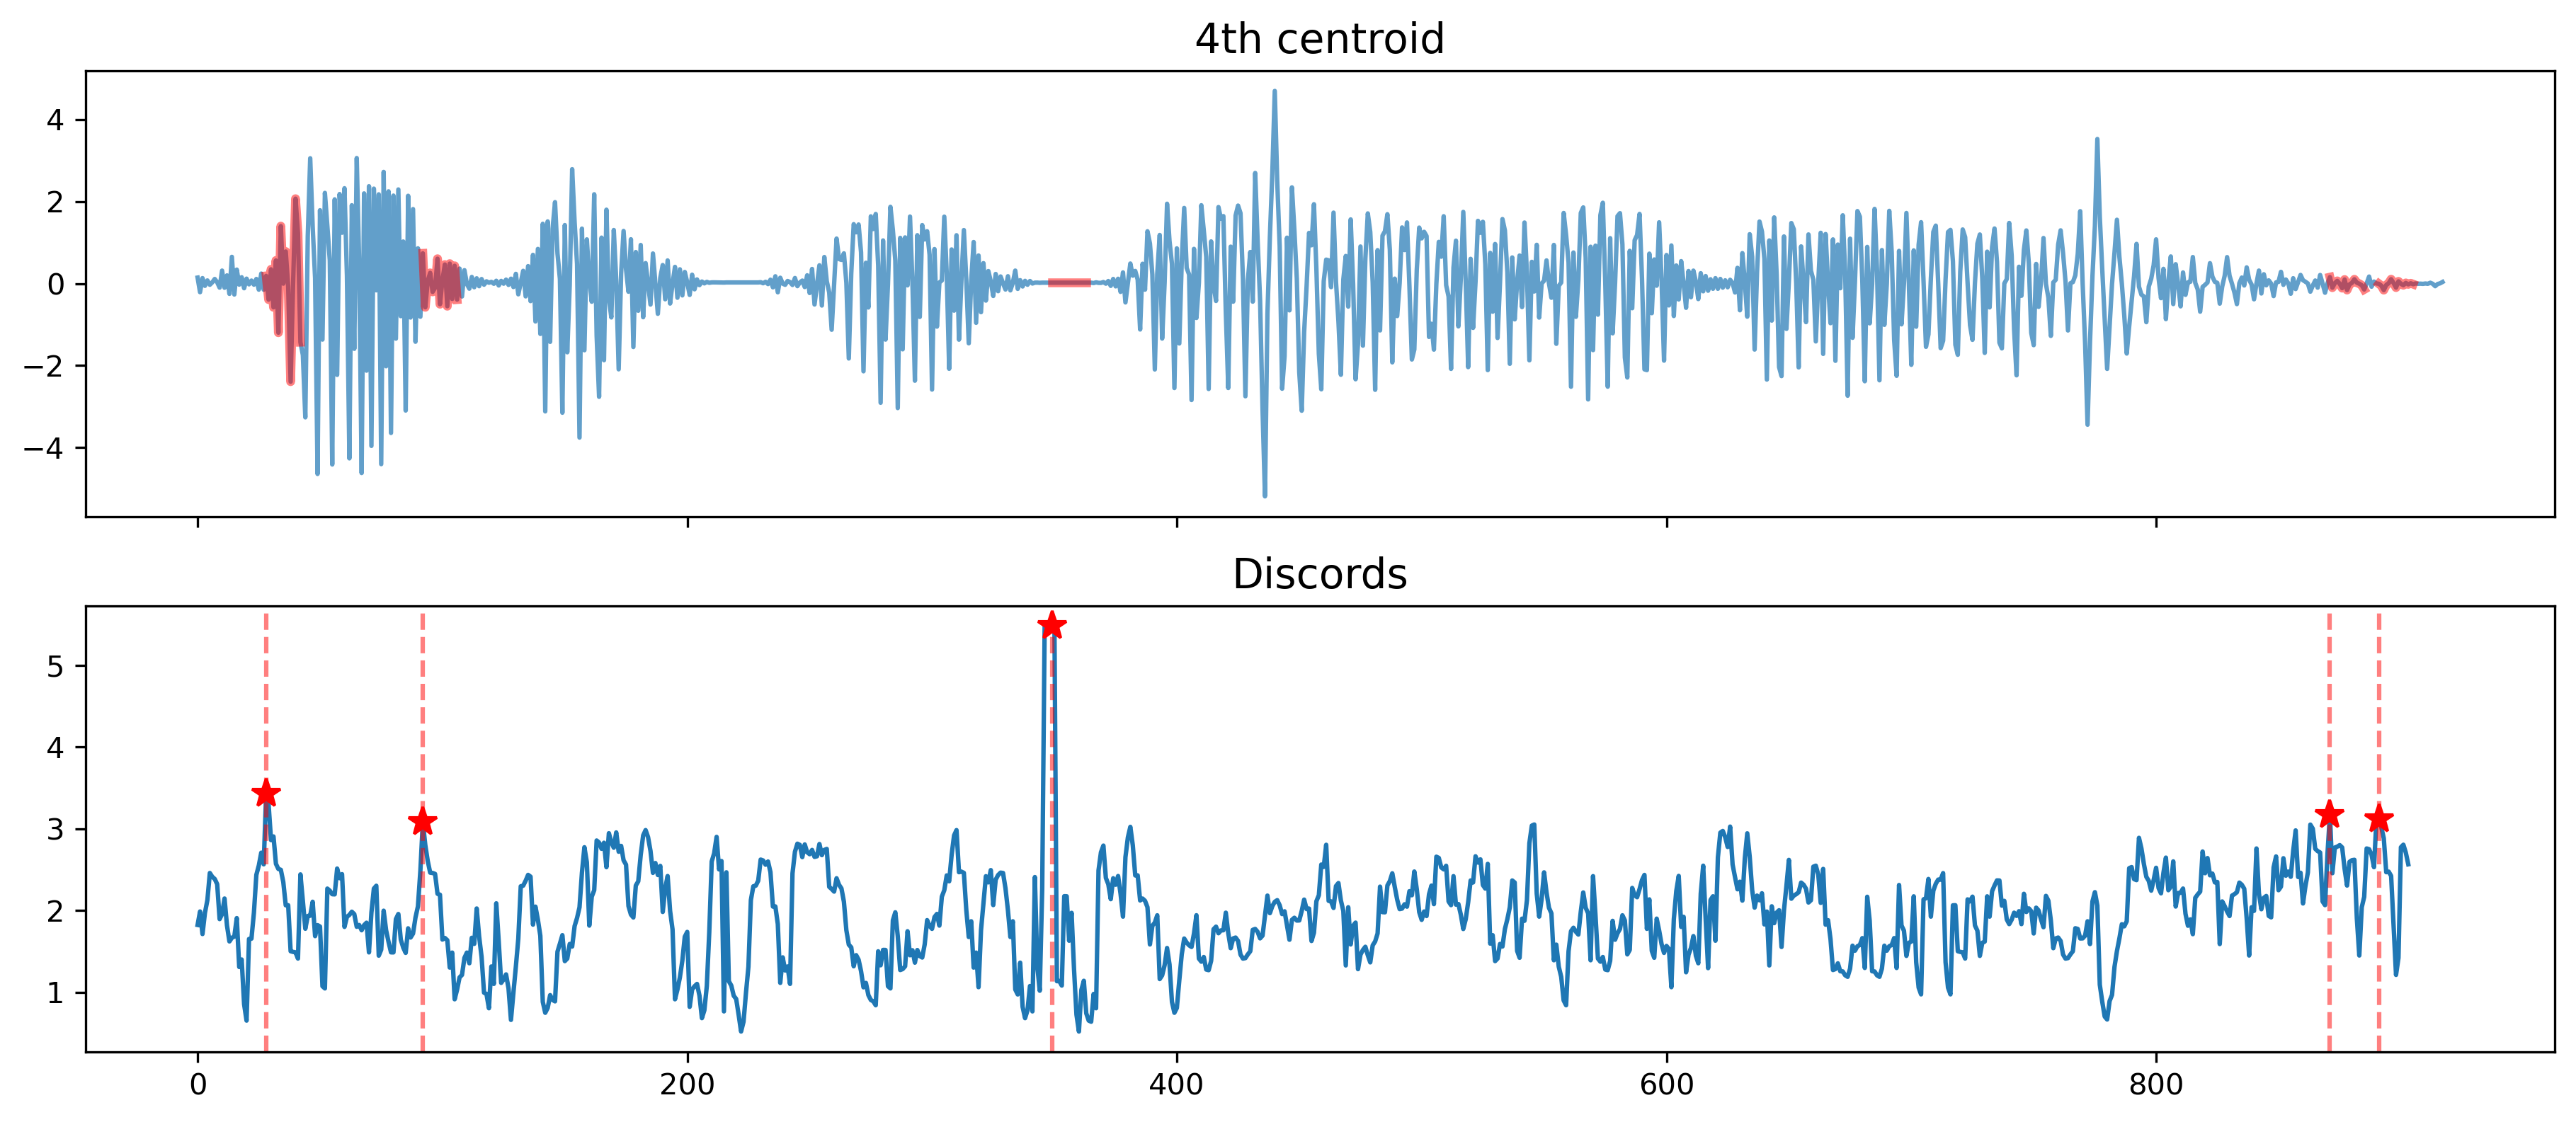

In [24]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,6), dpi=300)
axes[0].plot(ts, alpha=0.7)
axes[0].set_title('{}th centroid'.format(ith_centroid), size=14)

# plot the discords
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    axes[0].plot(range(a, a+w), a_shape, color='r', lw=3, alpha=0.5)

#Plot the Matrix Profile
axes[1].plot(mp)
axes[1].set_title('Discords', size=14)

# plot discords with stars
for discord in anoms:
    x = discord
    y = mp[discord]
    plt.plot(x, y, marker='*', markersize=10, c='r')
    axes[1].axvline(x, linestyle="dashed", c='r', alpha=0.5)
    #rect = Rectangle((x, 0), w, max(mp), facecolor='r', alpha=0.4)   # for the centroid plot
    #axes[2].add_patch(rect)


plt.show()

### Relations with shapelets

In [25]:
shapelets_imported = np.genfromtxt("Shapelets\shapelets.csv", delimiter=',')

In [26]:
shapelets_imported.shape

(8, 15)

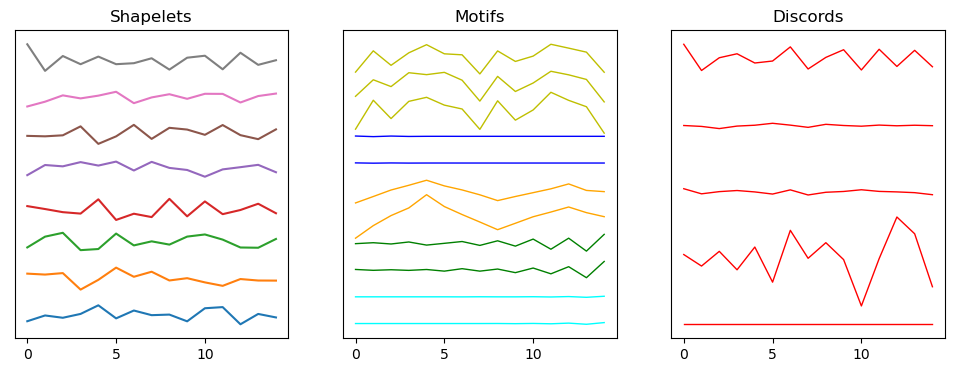

In [27]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12,4))
axes[0].set_title("Shapelets")
axes[1].set_title('Motifs')
axes[2].set_title('Discords')

shapelet_sizes = [8]

# plot the shaplets
offset = 0
for i in range(max(shapelet_sizes)):
    axes[0].plot(shapelets_imported[i] + offset)
    offset += 20

# plot the motifs
colors = ['cyan', 'g', 'orange', 'b', 'y'][:len(mo)]
offset = 0
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        axes[1].plot(range(0,0+w), (m_shape*7)+offset, color=c, lw=1)
        offset += 30

# plot the discords
offset = 0
for a in anoms:
    a_shape = ts[a:a+w]
    axes[2].plot(range(0, 0+w),  (a_shape*3)+offset, color='r', lw=1, alpha=1)
    offset += 10


# hide y-axis
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)

plt.show()

### Comparisons

In [28]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from pyts.metrics import dtw as dtw2

from scipy.spatial.distance import cdist

In [29]:
anoms

array([349,  28, 871, 891,  92])

In [30]:
mo

[[222, 360], [20, 127], [772, 780], [206, 338], [142, 272, 399]]

In [93]:
# discord
a = anoms[4]
ts1 = ts[a:a+w]*3

# shapelet
ts2 = shapelets_imported[7]

dist = dtw(ts1, ts2)
dist

10.736531499550509

In [31]:
# for every shapelet & motif
score_list = []
best_score = {'best':100, 'shapelet':0, 'motif':2}

w = 15
for i, shapelet in enumerate(shapelets_imported):
    for motif in mo:
        start = motif[0]
        ts1 = ts[start:start+w]
        ts2 = shapelet
        
        dist = dtw(ts1, ts2)
        #print(i, start, dist)
        score_list.append(dist)
        
        if dist <= best_score['best']:
            best_score['best'] = dist
            best_score['shapelet'] = i
            best_score['motif'] = start
        
#print(score_list)
print(best_score)

# for every shapelet & discord
score_list = []
best_score = {'best':100, 'shapelet':0, 'discord':0}

w = 15
for i, shapelet in enumerate(shapelets_imported):
    for anom in anoms:
        start = anom
        ts1 = ts[start:start+w]
        ts2 = shapelet
        
        dist = dtw(ts1, ts2)
        #print(i, start, dist)
        score_list.append(dist)
        
        if dist <= best_score['best']:
            best_score['best'] = dist
            best_score['shapelet'] = i
            best_score['discord'] = start
        
#print(score_list)
print(best_score)

{'best': 5.8497578031877, 'shapelet': 4, 'motif': 772}
{'best': 7.9532999848575185, 'shapelet': 6, 'discord': 28}


In [32]:
# best motif
ts1 = ts[772:772+w]
ts2 = shapelets_imported[4]

dist = dtw(ts1, ts2)
dist

5.8497578031877

In [41]:
# best discord
ts1 = ts[28:28+w]
ts2 = shapelets_imported[6]

dist = dtw(ts1, ts2)
dist

TypeError: dtw() missing 1 required positional argument: 'dist'

In [ ]:
mat = cdist(ts1.reshape(-1,1), ts2.reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

In [ ]:
dtw2(ts1.ravel(), ts2.ravel(), dist='square', method='fast')

In [ ]:
%pylab inline
from pylab import rcParams

In [ ]:
def dtw_parallel(x, y, dist, coeff=inf):
    """
    Computes Dynamic Time Warping (DTW) of two sequences with Itakura Parallelogram constraints

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param float coeff: angular coefficient of parallelogram (default=inf)

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j]) if abs(j-i) < (min(i,j,r-i,c-j)+1)*coeff else inf
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    if len(x)==1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1], C, D1, path

def distance(x,y):
    return abs(x-y)

# Function for inferring the optima path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

def matrix_and_best_path(mymatrix,path):
    import seaborn as sns
    sns.reset_orig()
    sns.set_context('notebook', font_scale=2.5)
    imshow(mymatrix.T, origin='lower', cmap=cm.gray, interpolation='nearest')
    title('Optimal path')
    plot(path[0], path[0], 'c-')
    plot(path[0], path[1], 'y')
    plot(path[0], path[1], 'ro')
    xlim(-0.5,mymatrix.shape[0]-0.5)
    ylim(-0.5,mymatrix.shape[1]-0.5)

In [42]:
def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path


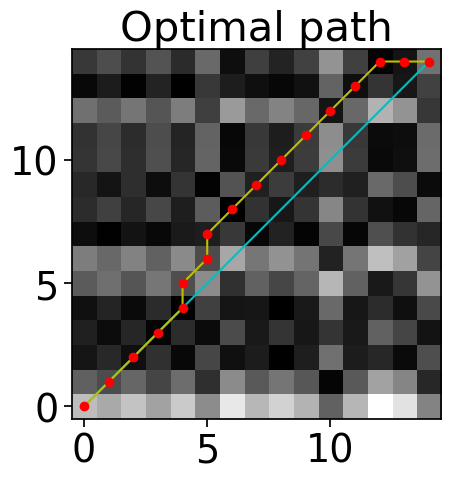

In [43]:
rcParams['figure.figsize'] = 30,5

d, aa, cc, ll = dtw(ts1,ts2,distance)
matrix_and_best_path(aa,ll)

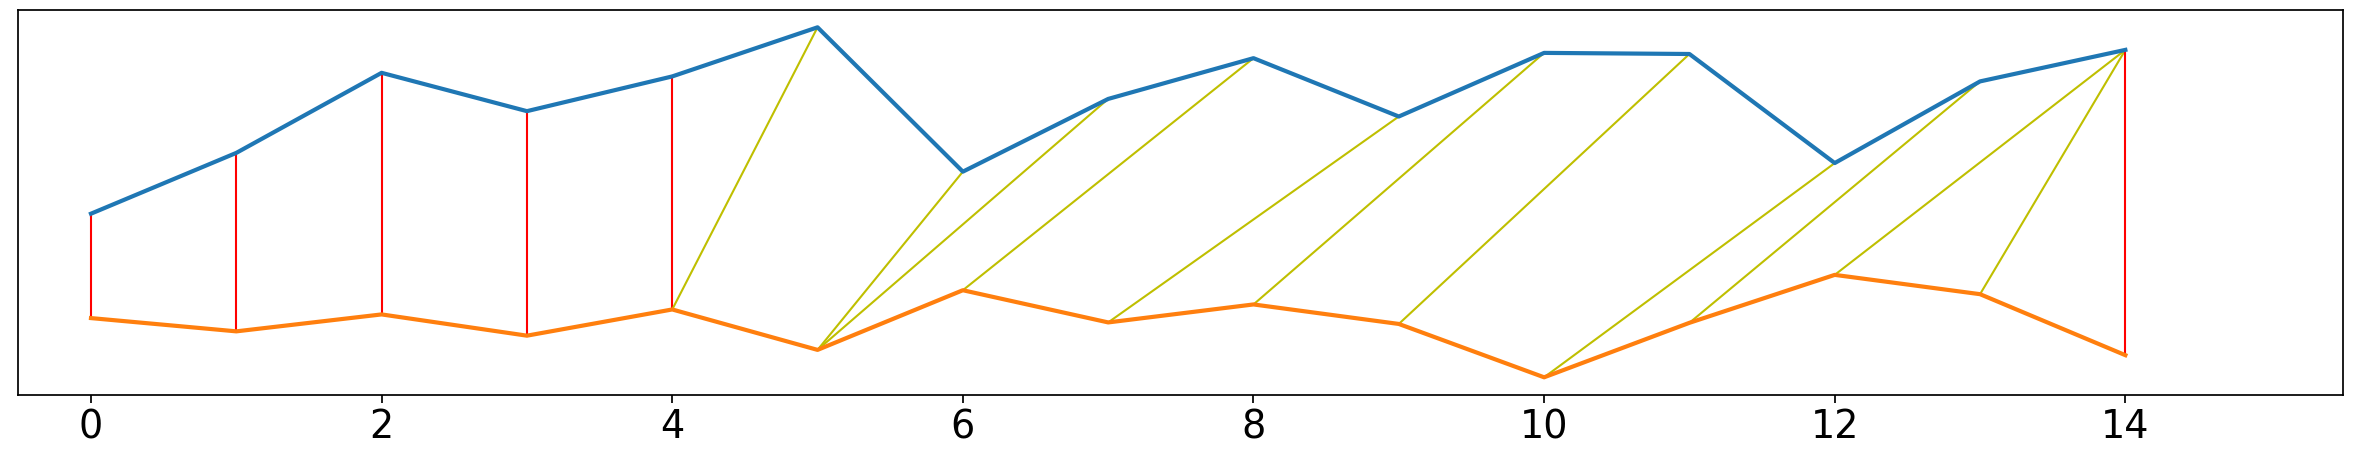

In [44]:
rcParams['figure.figsize'] = 30,5

yshift = 10  # shifts y a bit to make the plot more readable
for (i,j) in zip(ll[0],ll[1]):
    col = 'r-' if i == j else 'y-'
    plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
xlim(-0.5,max(len(ts1),len(ts2))+0.5)
plot(ts2+yshift, lw=3)
plot(ts1, lw=3)
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
show()

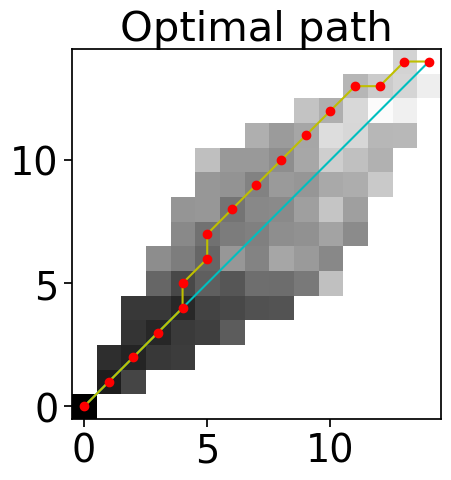

In [45]:
d, aa, cc, ll = dtw_parallel(ts1,ts2,distance, coeff=1.0)
matrix_and_best_path(cc,ll)

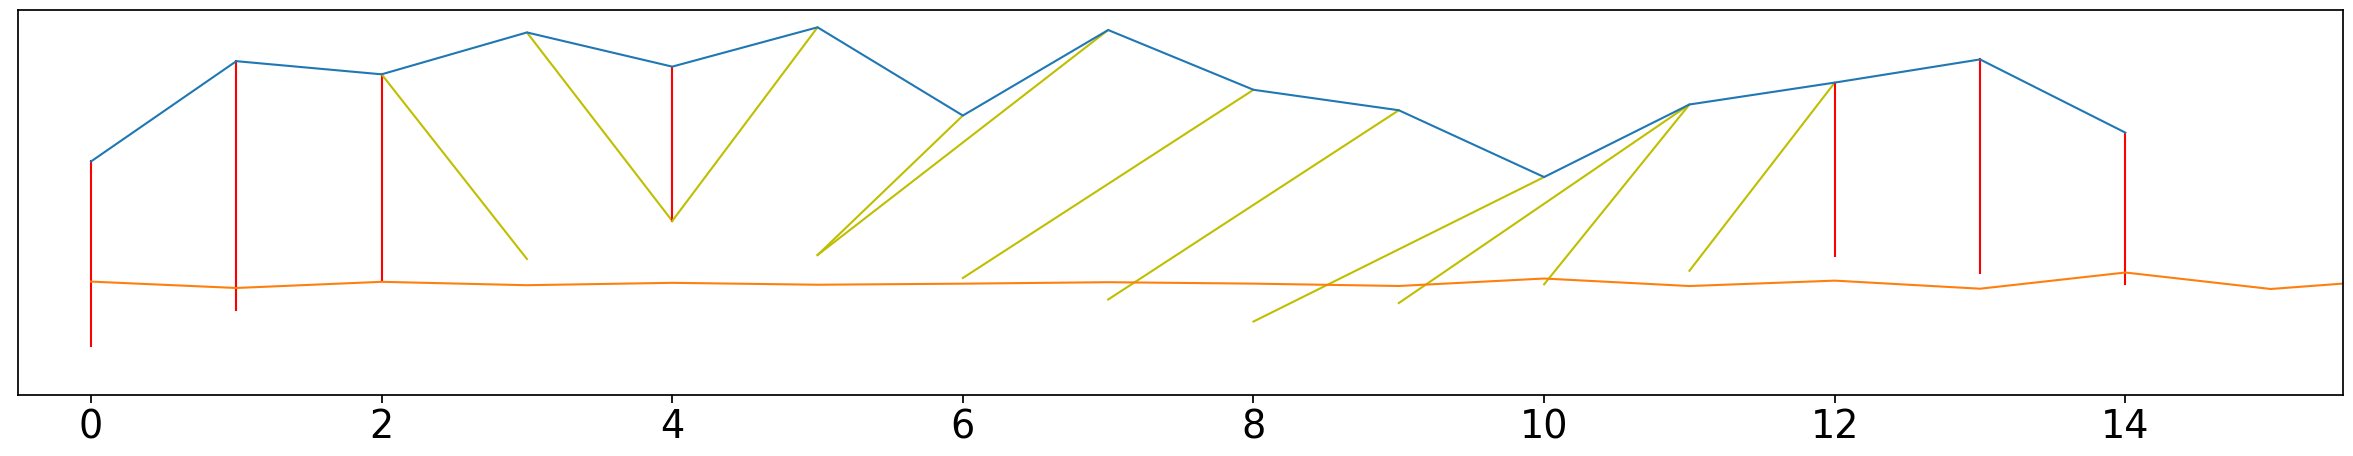

In [104]:
rcParams['figure.figsize'] = 30,5
rcParams['font.size'] = 10

yshift = 10  # shifts y a bit to make the plot more readable
for (i,j) in zip(ll[0],ll[1]):
    col = 'r-' if i == j else 'y-'
    plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
xlim(-0.5,max(len(ts1),len(ts2))+0.5)
plot(ts2+yshift)
plot(ts)
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
show()

## Matrixprofile tests

Tests with PAA time series

In [53]:
type(df['45'])

pandas.core.series.Series

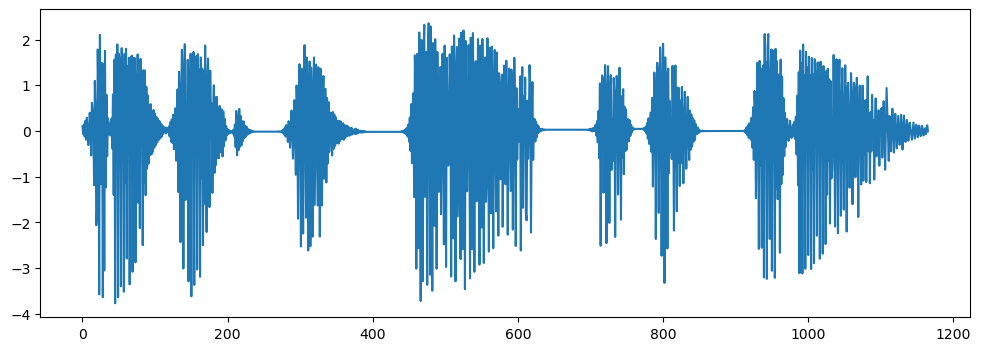

In [75]:
ts = df['49']
threshold = 0.1

start = np.min(np.where(abs(ts)>=threshold))
finish = np.max(np.where(abs(ts)>=threshold))
ts = ts[start:finish]

plt.figure(figsize=(12,4))
plt.plot(ts)
plt.show()

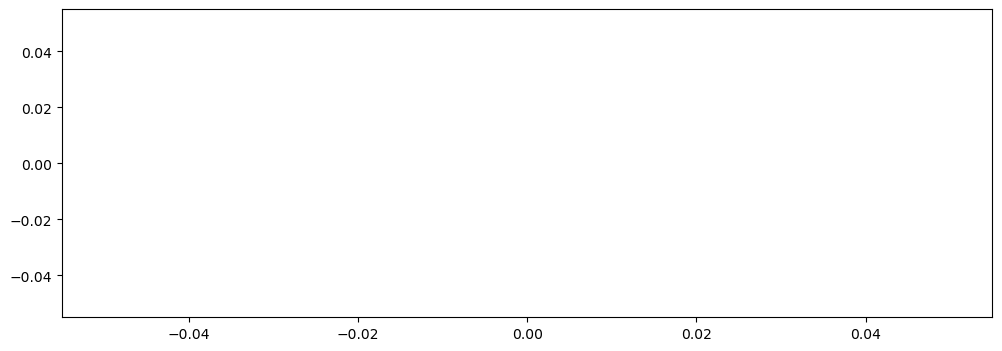

In [76]:
w = 32
mp, mpi = matrixProfile.stomp(ts.values, w)
# efficient algorithm

plt.figure(figsize=(12,4))
plt.plot(mp)
plt.show()

In [72]:
mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

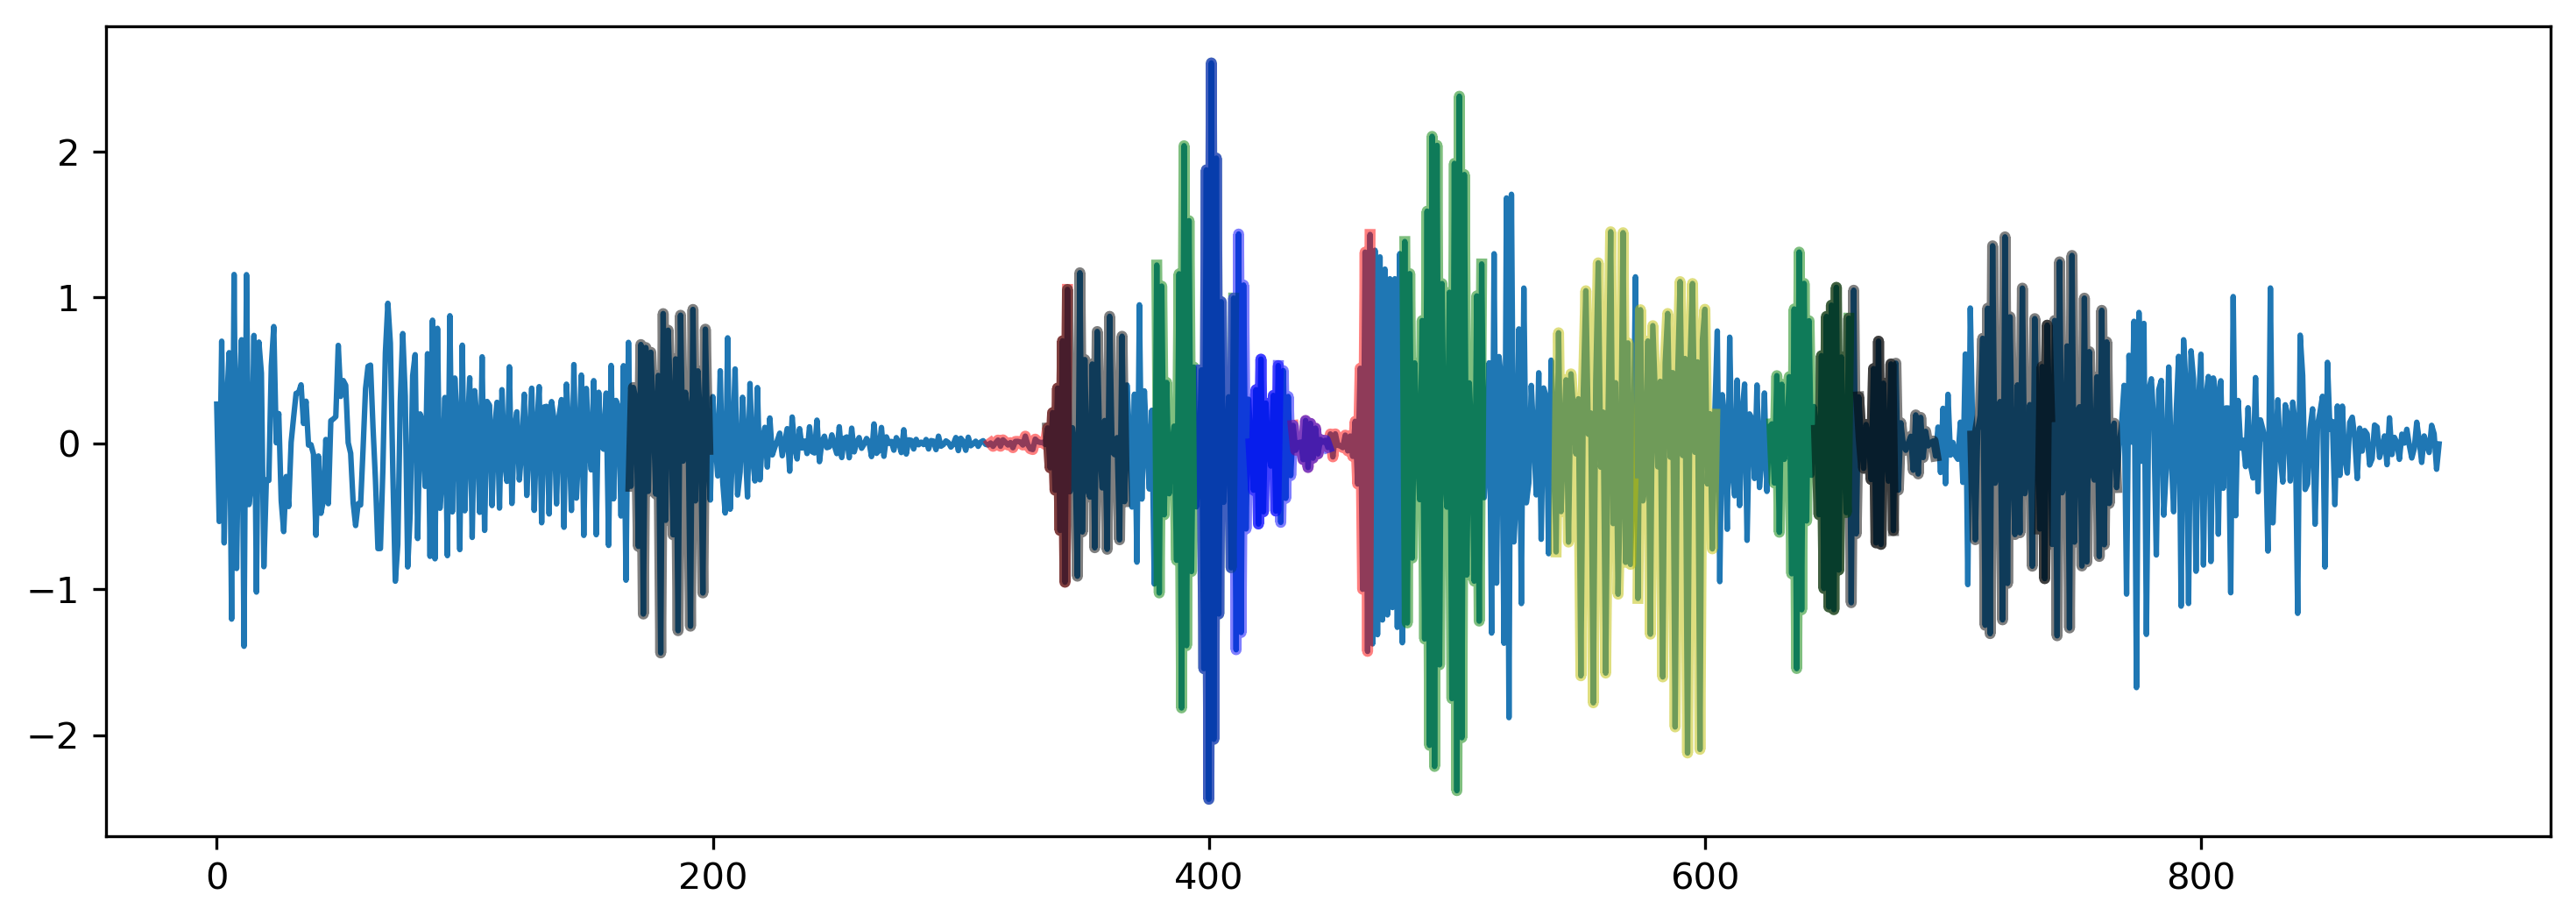

In [73]:
plt.figure(figsize=(12,4), dpi=300)
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3, alpha=0.5)

plt.show()

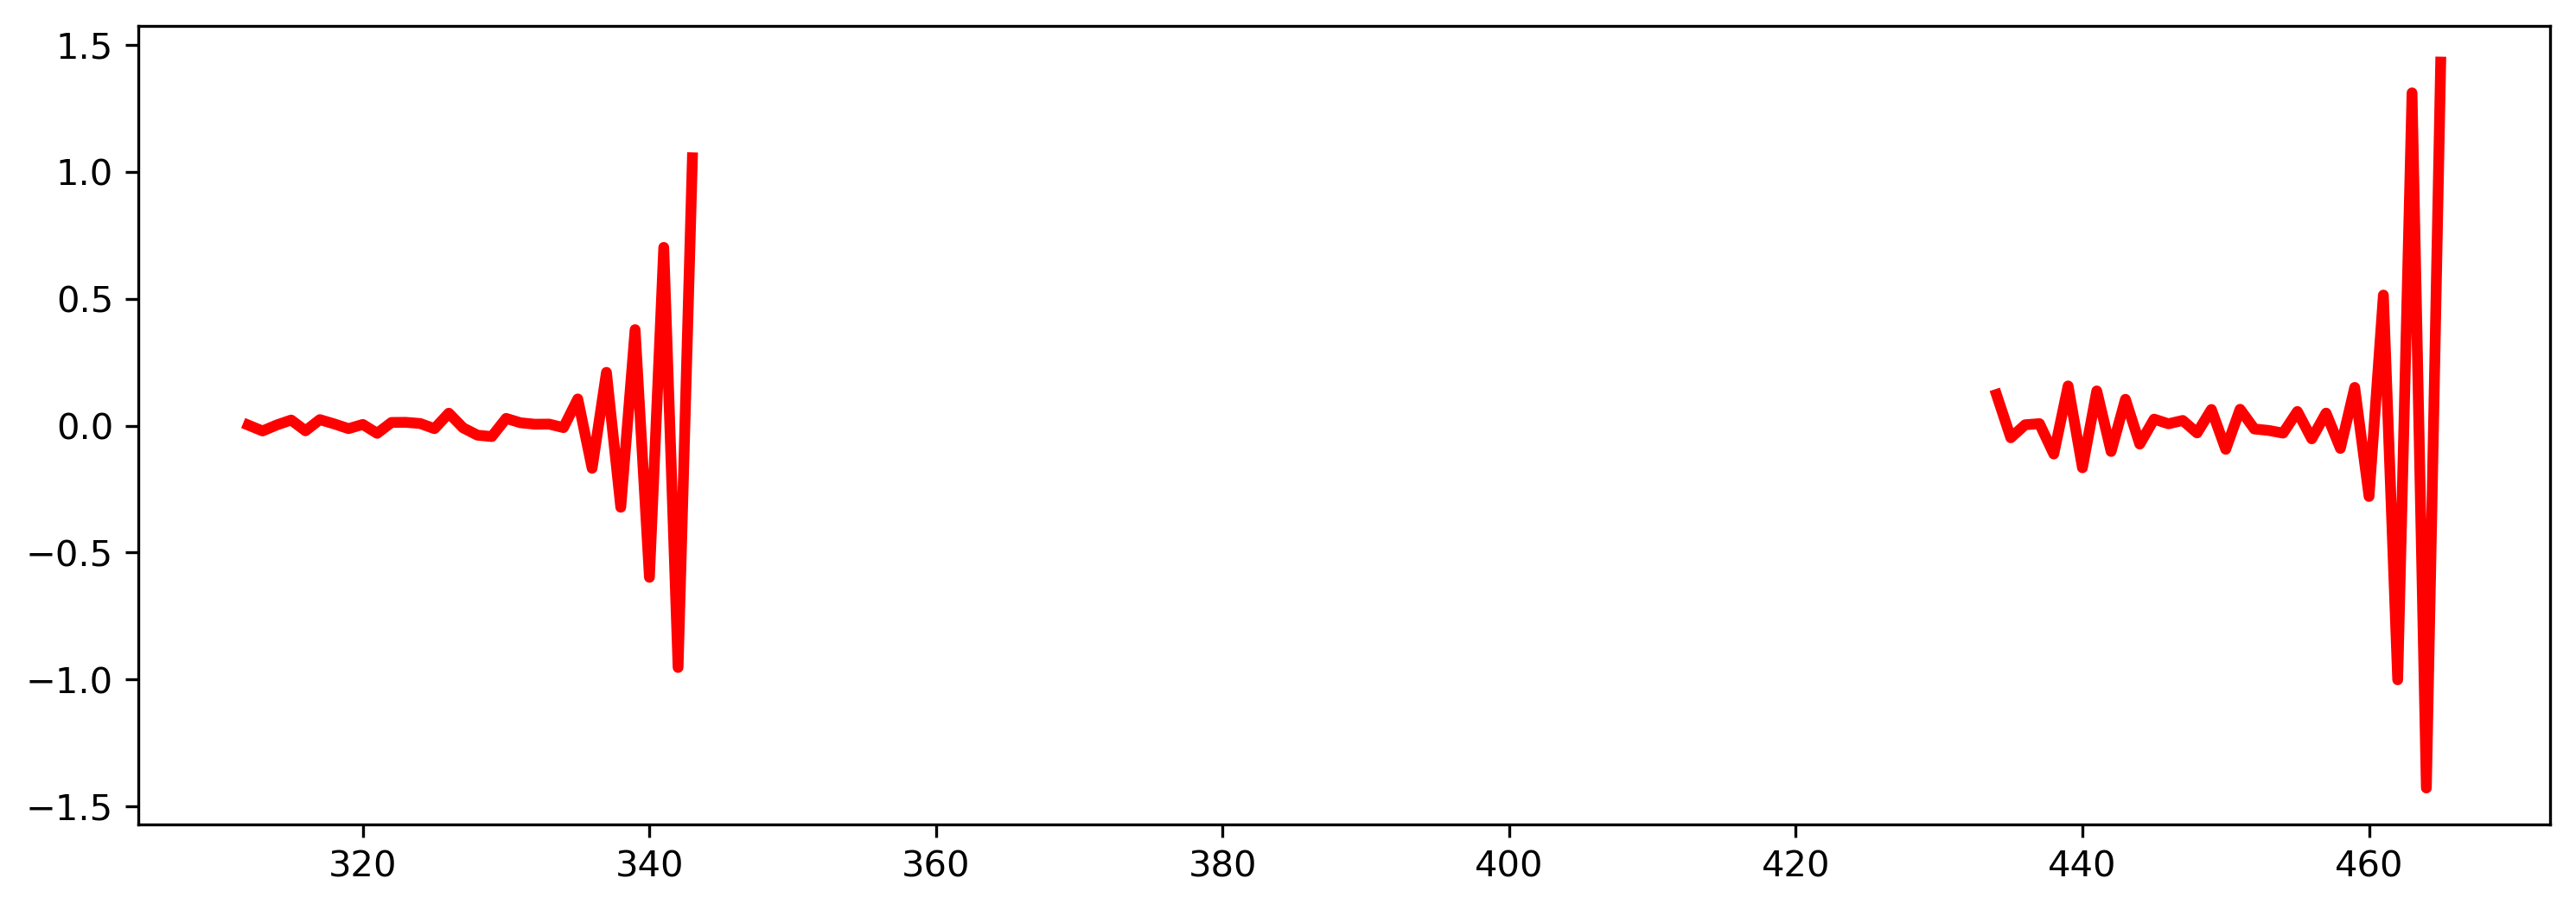

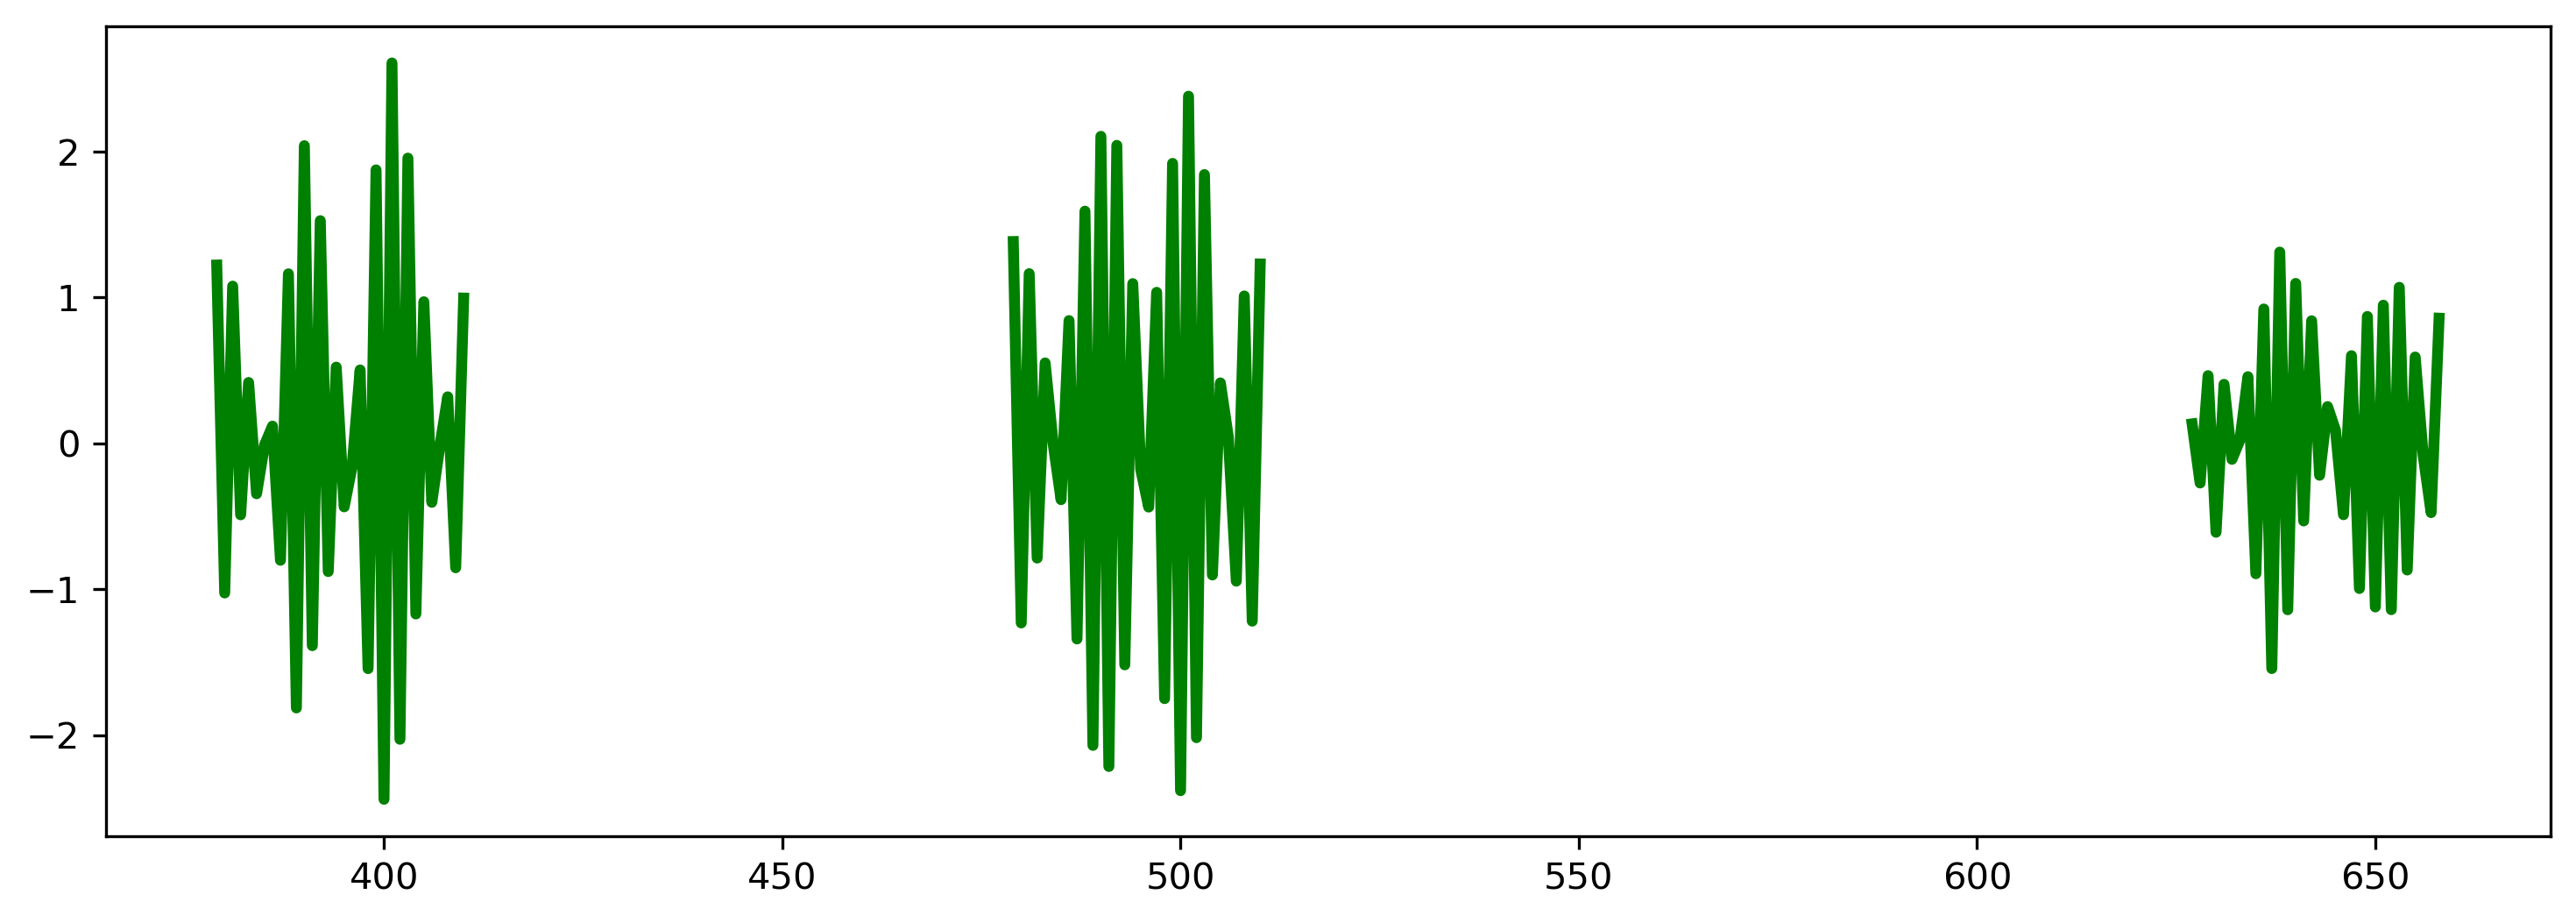

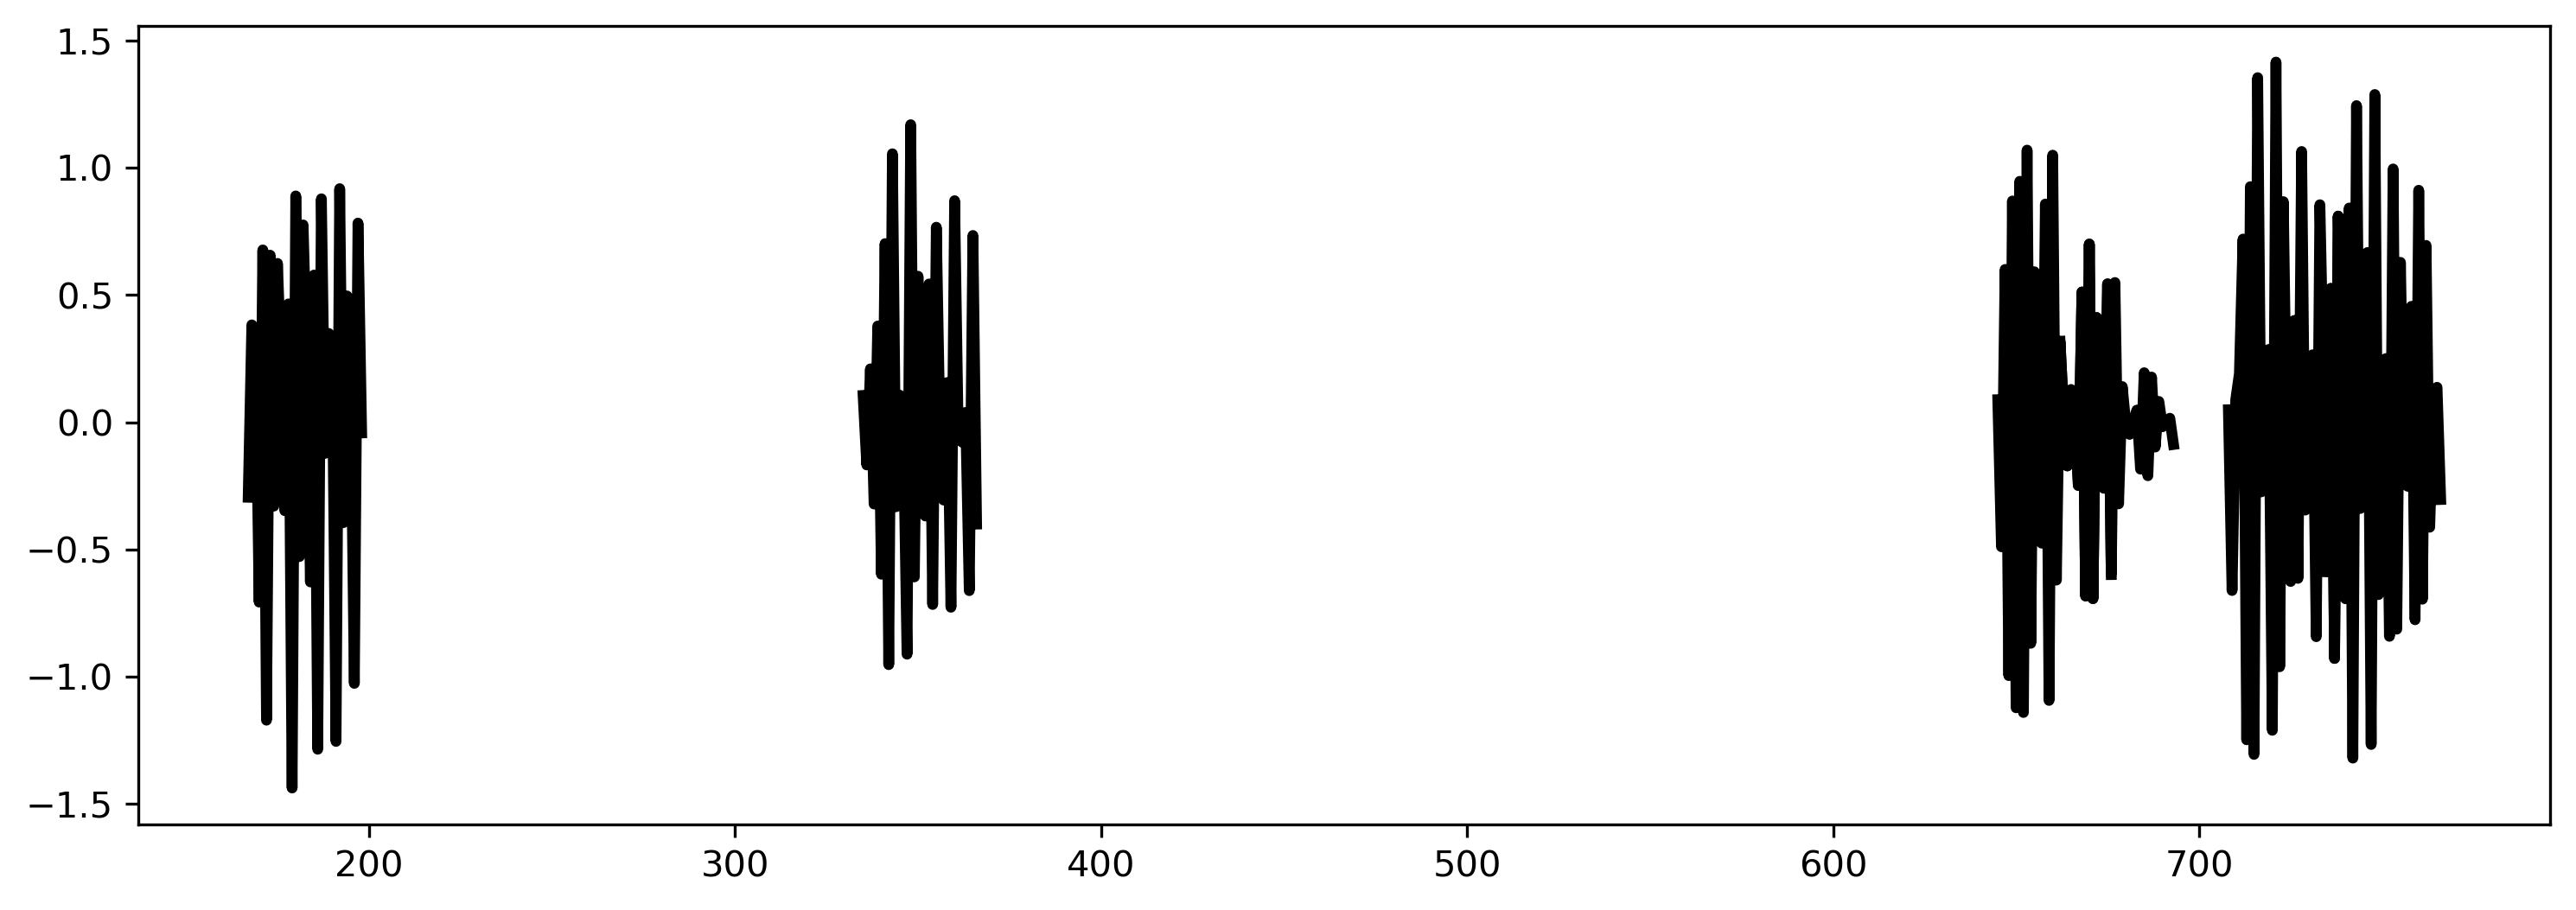

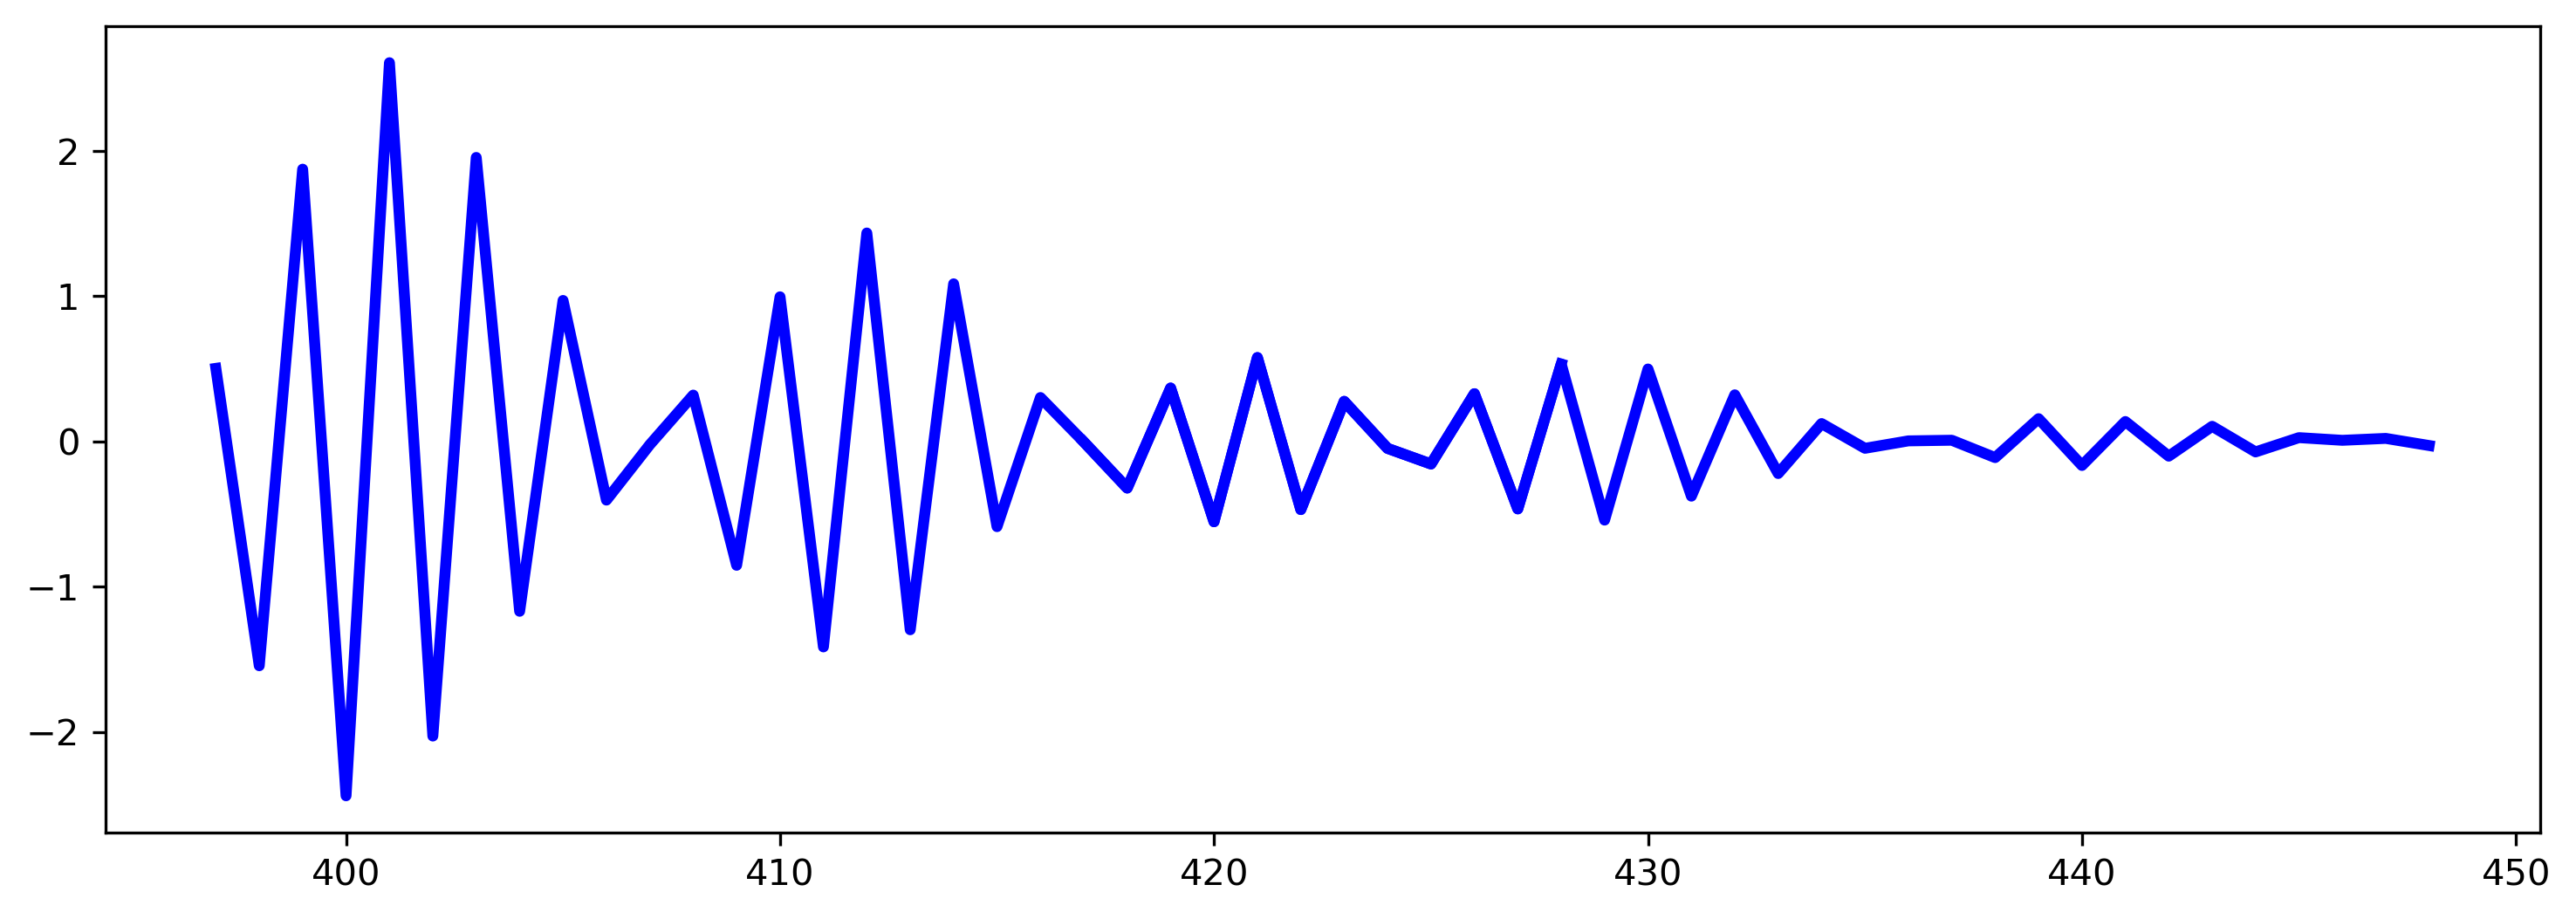

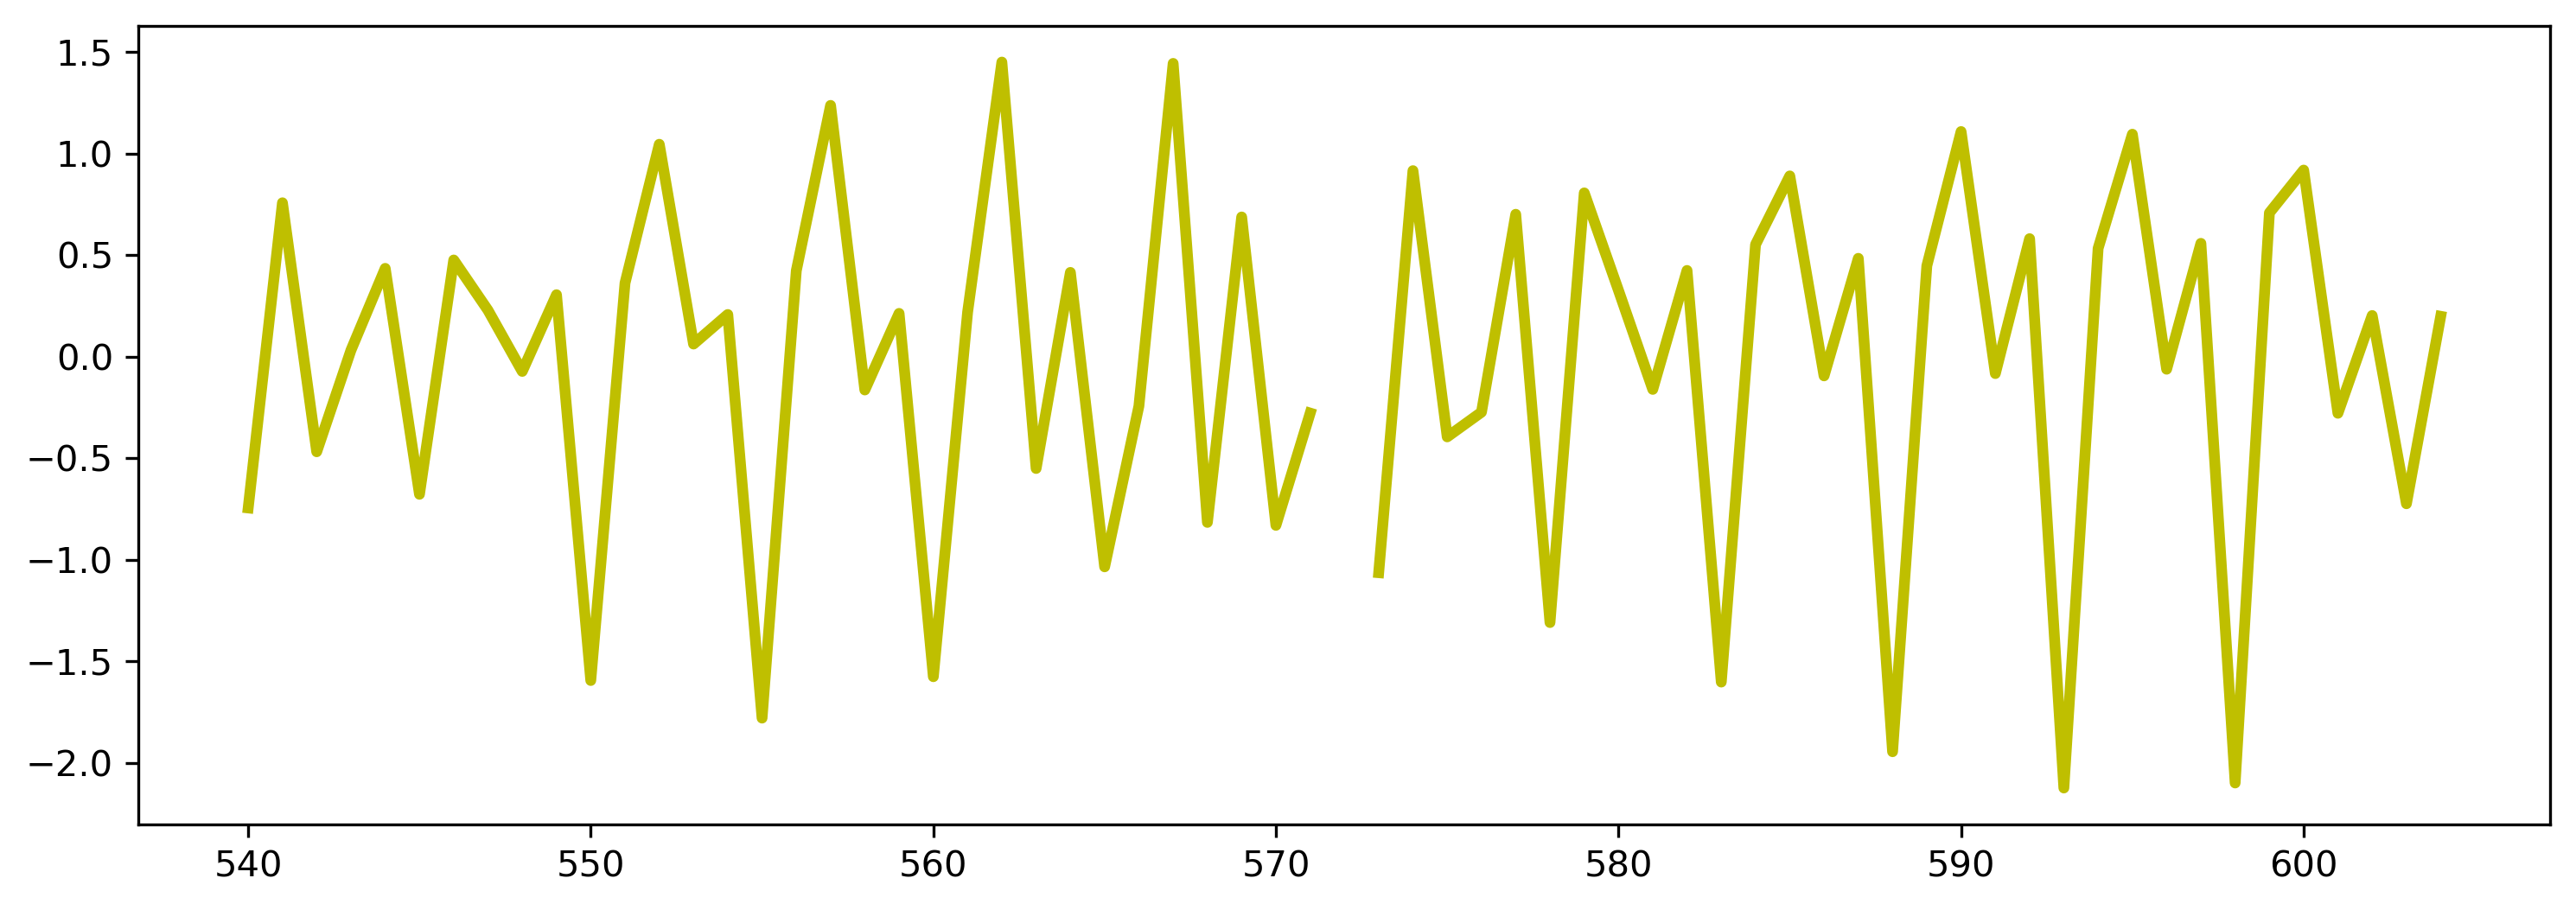

In [74]:
for m, d, c in zip(mo, mod, colors):
    plt.figure(figsize=(12,4), dpi=300)
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Anomaly discovery

In [15]:
from matrixprofile.discords import discords

In [16]:
anoms = discords(mp, ex_zone=3, k=5)

In [17]:
anoms

array([938, 941, 944, 947, 950])

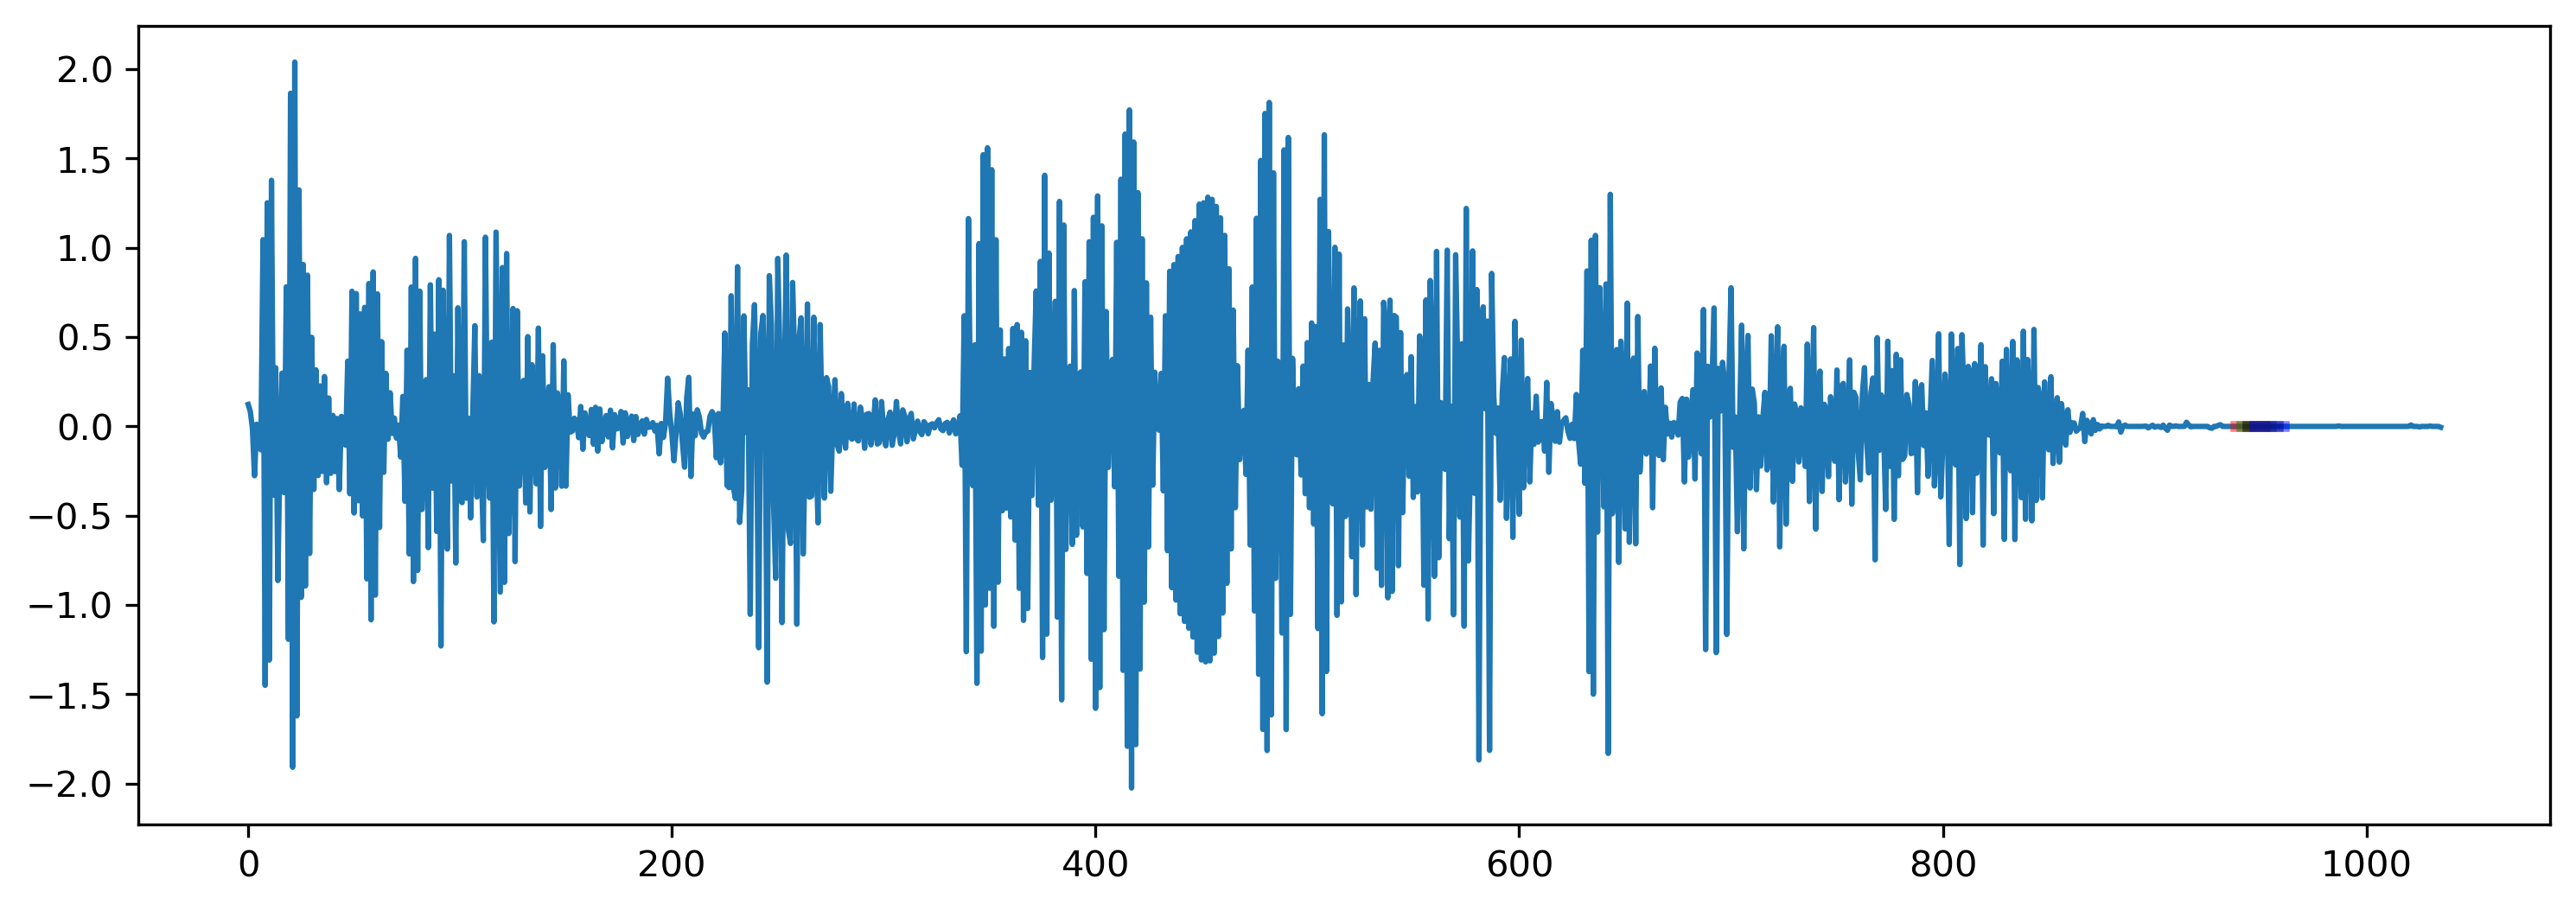

In [18]:
plt.figure(figsize=(12,4), dpi=300)
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3, alpha=0.5)

plt.show()

## Stumpy

In [25]:
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

In [15]:
import stumpy

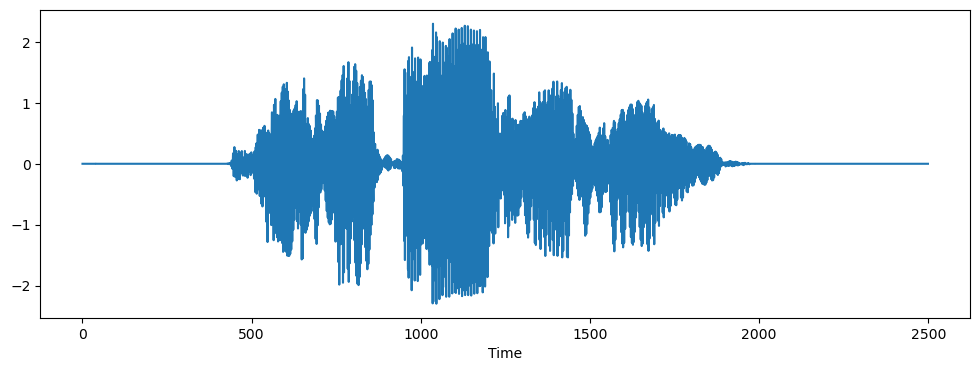

In [38]:
ts = df['70']

plt.figure(figsize=(12,4))
plt.xlabel('Time', fontsize ='10')
plt.plot(df['70'].values)
plt.show()

In [51]:
m = 64
mp = stumpy.stump(df['70'], m)

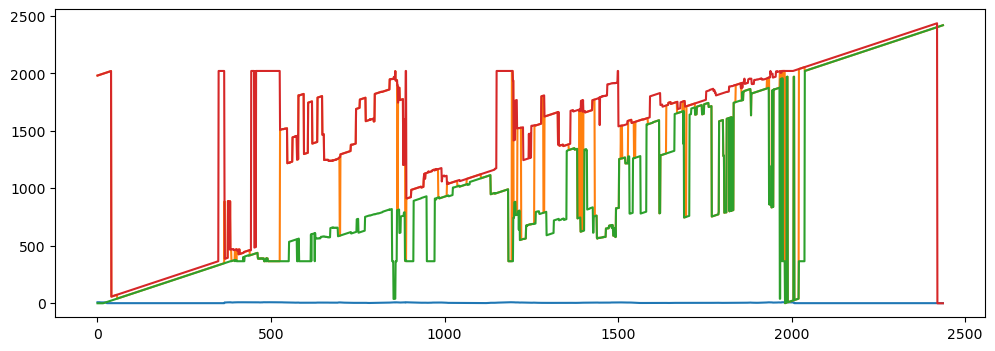

In [53]:
#mp = matrix_profile[:,0]
#mpi = matrix_profile[:,1]

plt.figure(figsize=(12,4))
plt.plot(mp)
plt.show()

In [52]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 2436


In [54]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 2419


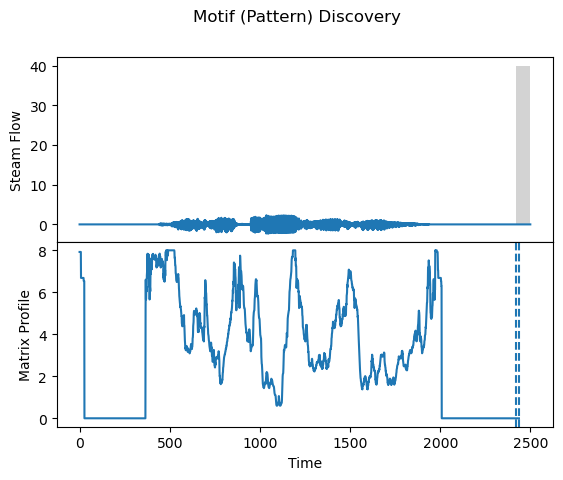

In [62]:

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='12')

axs[0].plot(df['70'].values)
axs[0].set_ylabel('Steam Flow', fontsize='10')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='10')
axs[1].set_ylabel('Matrix Profile', fontsize='10')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()